# **Real Estate Investment Advisor: Predicting Property Profitability & Future Value**

## **Project Summary -**


The *Real Estate Investment Advisor* project aims to build a machine learning–based system that helps investors make informed decisions about property investments. Using the provided housing dataset, the system performs two main tasks: (1) classifying whether a property is a **“Good Investment”**, and (2) predicting the **estimated property price after 5 years** through regression.

The workflow includes comprehensive data preprocessing, feature engineering, and exploratory data analysis to uncover important relationships between pricing, location, amenities, and property characteristics. Multiple machine learning models—such as Logistic Regression, Random Forest, XGBoost, Linear Regression, and ensemble methods—are developed and evaluated using metrics like Accuracy, Precision, Recall, ROC-AUC for classification, and RMSE, MAE, R² for regression.

To ensure reproducibility and experiment management, **MLflow** is integrated for tracking parameters, metrics, and model artifacts. A **Streamlit application** is also developed to provide users with an interactive interface where they can enter property details and instantly receive investment recommendations along with 5-year price predictions. The system additionally offers visual insights such as trends and feature importance.

Overall, the project delivers a complete end-to-end solution—from data analysis to model deployment—demonstrating how machine learning can support decision-making in the real estate and financial analytics domain.


## **Problem Statement**

Develop a machine learning application to assist potential investors in making real estate decisions. The system should:

- Classify whether a property is a **"Good Investment"** (Classification).
- Predict the estimated property price after 5 years (Regression).
- Use the provided dataset to preprocess and analyze the data, engineer relevant features, and deploy a user-interactive application using **Streamlit** that provides investment recommendations and price forecasts.
- **MLflow** will be used for experiment tracking.


## **Github link**

In [55]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score, classification_report
)


import mlflow
import mlflow.sklearn

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*artifact_path.*deprecated.*")

# Optional: nicer plots
sns.set(style="whitegrid", context="notebook")

In [2]:
# Load the dataset
file_path = "C:\\Users\\beena\\Downloads\\india_housing_prices.csv"
df = pd.read_csv(file_path)

print("Shape of data:", df.shape)

Shape of data: (250000, 23)


In [3]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,250000.0,NaN,NaN,NaN,125000.5,72168.927986,1.0,62500.75,125000.5,187500.25,250000.0
State,250000,20,Odisha,12681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,250000,42,Coimbatore,6461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality,250000,500,Locality_296,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property_Type,250000,3,Villa,83744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BHK,250000.0,NaN,NaN,NaN,2.999396,1.415521,1.0,2.0,3.0,4.0,5.0
Size_in_SqFt,250000.0,NaN,NaN,NaN,2749.813216,1300.606954,500.0,1623.0,2747.0,3874.0,5000.0
Price_in_Lakhs,250000.0,NaN,NaN,NaN,254.586854,141.349921,10.0,132.55,253.87,376.88,500.0
Price_per_SqFt,250000.0,NaN,NaN,NaN,0.130597,0.130747,0.0,0.05,0.09,0.16,0.99
Year_Built,250000.0,NaN,NaN,NaN,2006.520012,9.808575,1990.0,1998.0,2007.0,2015.0,2023.0


In [6]:
print("\nColumns:")
print(df.columns.tolist())


Columns:
['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


In [7]:
# === CONFIG: CHANGE THESE TO MATCH YOUR DATASET COLUMN NAMES ===

# Price column (in Lakhs or full amount)
PRICE_COL = "Price_in_Lakhs"       

# Built-up area / size column (in sq.ft)
SIZE_COL = "Size_in_SqFt"           

# Year the property was built
YEAR_BUILT_COL = "Year_Built"       

# Optional numeric columns that describe location/access/amenities
POSSIBLE_NUMERIC_EXTRA = [
    "Nearby_Schools",
    "Nearby_Hospitals",
    "Public_Transport_Accessibility",
    "Parking_Space",
    "Security"
]


In [8]:
#Remove duplicates, inspect missing
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

df.isna().sum().sort_values(ascending=False).head(20)


Duplicates before: 0
Duplicates after: 0


ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
dtype: int64

In [9]:
# Identify numeric & categorical columns from your data
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

display(pd.DataFrame(numeric_cols, columns=["Numeric Columns"]))
display(pd.DataFrame(categorical_cols, columns=["Categorical Columns"]))


,Numeric Columns
0,ID
1,BHK
2,Size_in_SqFt
3,Price_in_Lakhs
4,Price_per_SqFt
5,Year_Built
6,Floor_No
7,Total_Floors
8,Age_of_Property
9,Nearby_Schools


,Categorical Columns
0,State
1,City
2,Locality
3,Property_Type
4,Furnished_Status
5,Public_Transport_Accessibility
6,Parking_Space
7,Security
8,Amenities
9,Facing


In [10]:
# Fill numeric missing with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing with mode
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum().sort_values(ascending=False).head(10)


ID                0
State             0
City              0
Locality          0
Property_Type     0
BHK               0
Size_in_SqFt      0
Price_in_Lakhs    0
Price_per_SqFt    0
Year_Built        0
dtype: int64

In [11]:
#Feature Engineering
def add_features(data: pd.DataFrame) -> pd.DataFrame:
    df_fe = data.copy()
    current_year = datetime.now().year
    
    # 1) Price_per_SqFt
    if PRICE_COL in df_fe.columns and SIZE_COL in df_fe.columns:
        df_fe["Price_per_SqFt"] = (df_fe[PRICE_COL] * 100000) / df_fe[SIZE_COL]
        print("Created column: Price_per_SqFt")
    
    # 2) Age_of_Property
    if YEAR_BUILT_COL in df_fe.columns:
        df_fe["Age_of_Property"] = current_year - df_fe[YEAR_BUILT_COL]
        print("Created column: Age_of_Property")
    
    # 3) Future_Price_5Y using simple growth formula
    annual_growth_rate = 0.06  # 6% per year
    years = 5
    
    if PRICE_COL in df_fe.columns:
        df_fe["Future_Price_5Y"] = df_fe[PRICE_COL] * ((1 + annual_growth_rate) ** years)
        print("Created column: Future_Price_5Y")
    
    # 4) Growth percent & Good_Investment label
    if "Future_Price_5Y" in df_fe.columns and PRICE_COL in df_fe.columns:
        df_fe["Price_Growth_Percent"] = (
            (df_fe["Future_Price_5Y"] - df_fe[PRICE_COL]) / df_fe[PRICE_COL]
        ) * 100
        
        df_fe["Good_Investment"] = (df_fe["Price_Growth_Percent"] >= 30).astype(int)
        print("Created column: Good_Investment (0/1)")
    
    return df_fe

df = add_features(df)

# Show new columns if present
cols_to_show = [c for c in ["Price_per_SqFt", "Age_of_Property", "Future_Price_5Y",
                            "Price_Growth_Percent", "Good_Investment"] if c in df.columns]
df[cols_to_show].head()


Created column: Price_per_SqFt
Created column: Age_of_Property
Created column: Future_Price_5Y
Created column: Good_Investment (0/1)


,Price_per_SqFt,Age_of_Property,Future_Price_5Y,Price_Growth_Percent,Good_Investment
0,10332.489451,35,655.409359,33.822558,1
1,8270.727580,17,261.649865,33.822558,1
2,5046.403075,28,245.952479,33.822558,1
3,10955.490697,34,401.855759,33.822558,1
4,3792.245490,23,244.761458,33.822558,1


## Exploratory Data Analysis

### **Price & Size Analysis**

#### **1) What is the distribution of property prices?**

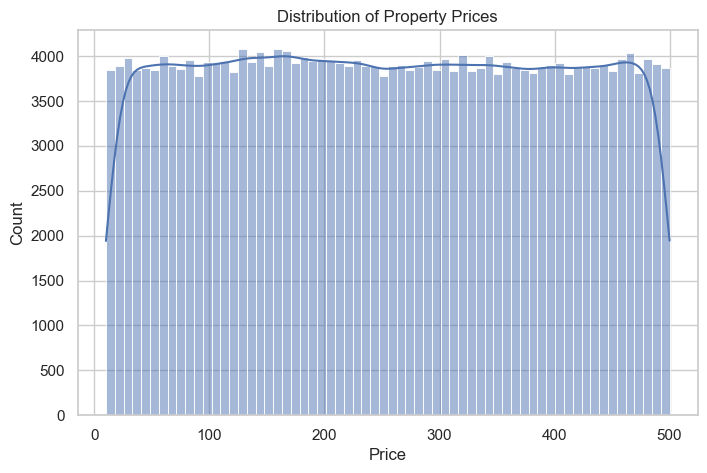

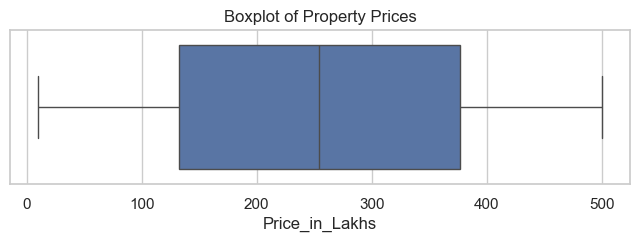

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df[PRICE_COL], kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Boxplot to see skew/outliers
plt.figure(figsize=(8,2))
sns.boxplot(x=df[PRICE_COL])
plt.title("Boxplot of Property Prices")
plt.show()


#### Insights : Property prices are right-skewed, indicating a small number of very expensive listings.

#### **2) What is the distribution of property sizes?**

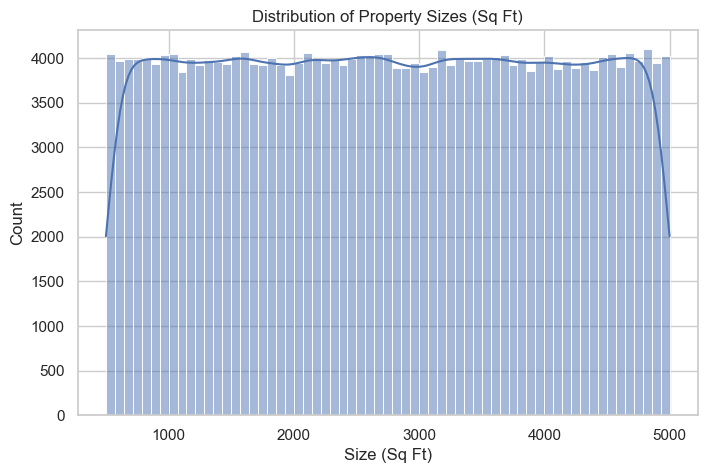

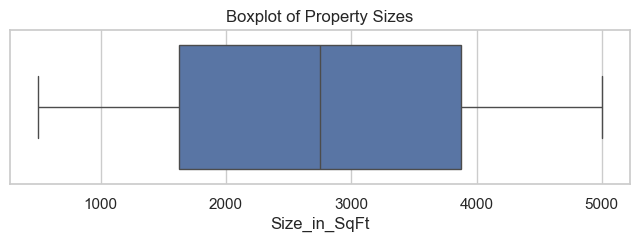

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df[SIZE_COL], kde=True)
plt.title("Distribution of Property Sizes (Sq Ft)")
plt.xlabel("Size (Sq Ft)")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(8,2))
sns.boxplot(x=df[SIZE_COL])
plt.title("Boxplot of Property Sizes")
plt.show()


#### Insights : Most properties fall into a moderate size range, with a few large outliers.

#### **3) How does price per sq ft vary by property type?**

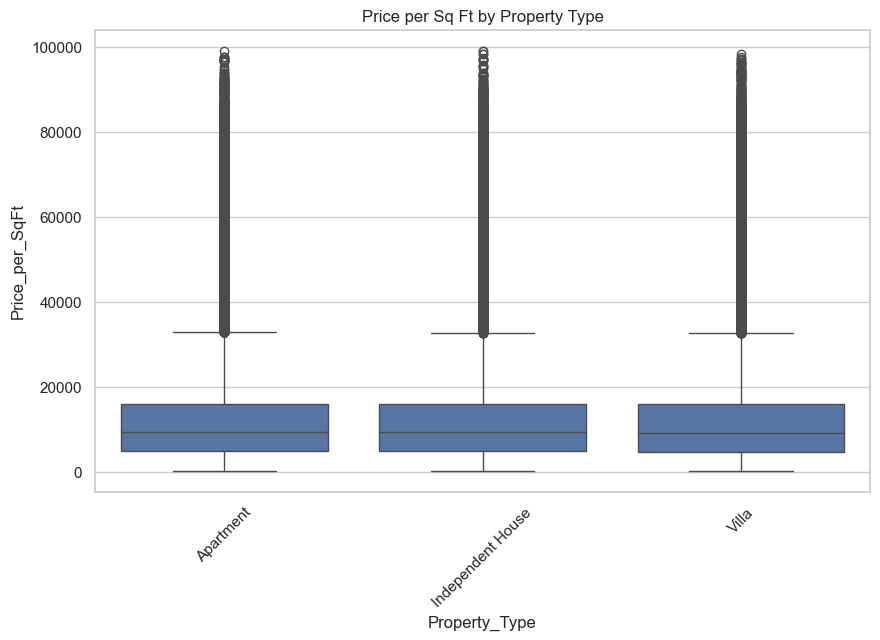

In [14]:
if "Property_Type" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="Property_Type", y="Price_per_SqFt")
    plt.xticks(rotation=45)
    plt.title("Price per Sq Ft by Property Type")
    plt.show()
else:
    print("Columns 'Property_Type' or 'Price_per_SqFt' not found in dataset.")


#### Insights : Apartments generally show higher price per sq ft compared to independent houses.

#### **4) Is there a relationship between property size and price?**

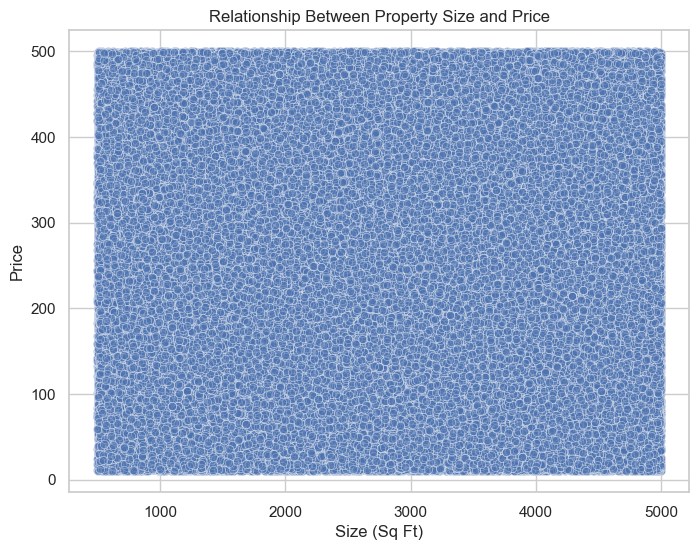

Correlation between Size and Price: -0.002528546792538917


In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=SIZE_COL, y=PRICE_COL, alpha=0.5)
plt.title("Relationship Between Property Size and Price")
plt.xlabel("Size (Sq Ft)")
plt.ylabel("Price")
plt.show()

# Correlation value
corr = df[[SIZE_COL, PRICE_COL]].corr().iloc[0,1]
print("Correlation between Size and Price:", corr)


#### Insights : Larger properties tend to cost more, showing a positive correlation between size and price.

#### **5) Are there any outliers in price per sq ft or property size?**

In [16]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    
    return len(outliers), lower, upper

# Size outliers
count_size, lower_s, upper_s = detect_outliers(df[SIZE_COL])
print(f"Size Outliers: {count_size} | Range allowed: {lower_s:.2f} to {upper_s:.2f}")

# Price per sqft outliers
if "Price_per_SqFt" in df.columns:
    count_pps, lower_p, upper_p = detect_outliers(df["Price_per_SqFt"])
    print(f"Price_per_SqFt Outliers: {count_pps} | Range allowed: {lower_p:.2f} to {upper_p:.2f}")


Size Outliers: 0 | Range allowed: -1753.50 to 7250.50
Price_per_SqFt Outliers: 19723 | Range allowed: -11973.98 to 32764.21


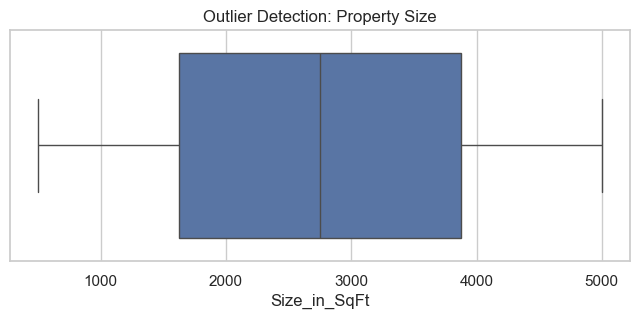

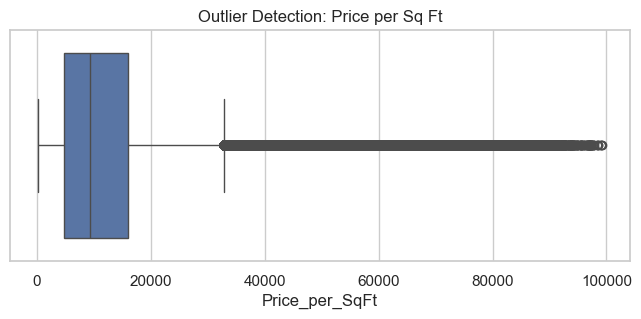

In [17]:
# Size outliers
plt.figure(figsize=(8,3))
sns.boxplot(x=df[SIZE_COL])
plt.title("Outlier Detection: Property Size")
plt.show()

# Price_per_SqFt outliers
if "Price_per_SqFt" in df.columns:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df["Price_per_SqFt"])
    plt.title("Outlier Detection: Price per Sq Ft")
    plt.show()


#### Insights : Both price per sq ft and property size contain significant outliers, typical for real estate data.

### **Location-based Analysis**

#### **6) What is the average price per sq ft by state?**

State
Karnataka         13252.204917
Andhra Pradesh    13201.578864
Uttar Pradesh     13142.519674
Tamil Nadu        13132.420881
Telangana         13093.098906
Gujarat           13091.146124
Assam             13084.021592
Maharashtra       13070.133821
Madhya Pradesh    13069.029240
Haryana           13068.740834
West Bengal       13060.549046
Bihar             13050.620946
Odisha            13032.919043
Chhattisgarh      13027.130006
Uttarakhand       13027.094730
Kerala            12982.217256
Jharkhand         12975.461596
Delhi             12941.348892
Rajasthan         12932.174302
Punjab            12931.487613
Name: Price_per_SqFt, dtype: float64


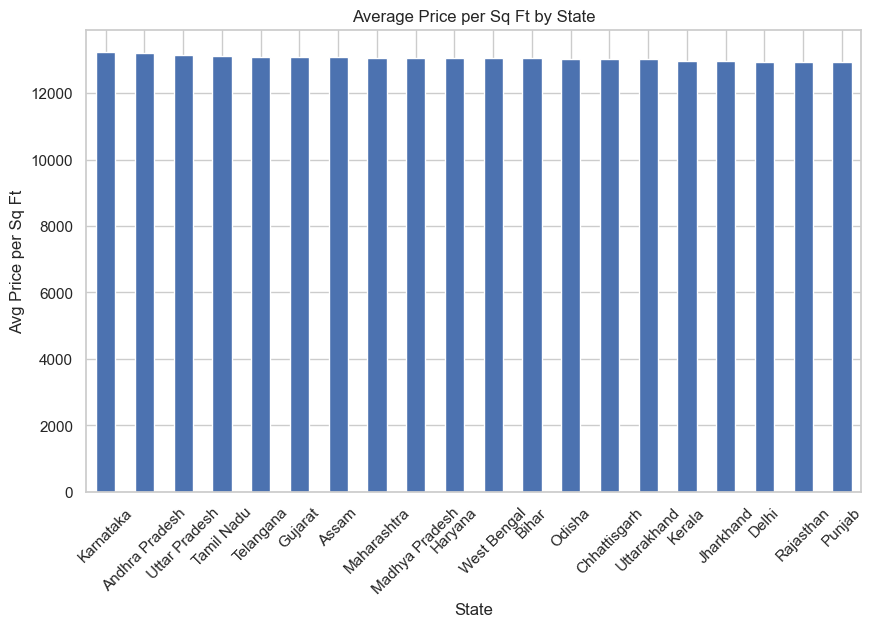

In [18]:
if "State" in df.columns and "Price_per_SqFt" in df.columns:
    avg_pps_state = df.groupby("State")["Price_per_SqFt"].mean().sort_values(ascending=False)
    print(avg_pps_state)

    plt.figure(figsize=(10,6))
    avg_pps_state.plot(kind="bar")
    plt.title("Average Price per Sq Ft by State")
    plt.ylabel("Avg Price per Sq Ft")
    plt.xlabel("State")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns missing: 'State' or 'Price_per_SqFt'")


#### Insights : Some states command far higher price per sq ft, reflecting regional demand differences.

#### **7) What is the average property price by city?**

City
Bangalore         258.456639
Surat             258.080467
Kochi             257.415221
Gaya              257.053391
Mangalore         256.920925
Dehradun          256.890115
Mysore            256.848172
Chennai           256.830172
Hyderabad         256.594051
Coimbatore        256.504745
Bhopal            256.498896
Pune              256.495661
Noida             256.287206
Lucknow           256.212431
Vishakhapatnam    255.772442
Nagpur            255.532012
Indore            255.413825
Jaipur            255.246241
Bhubaneswar       254.902173
Faridabad         254.862393
Name: Price_in_Lakhs, dtype: float64


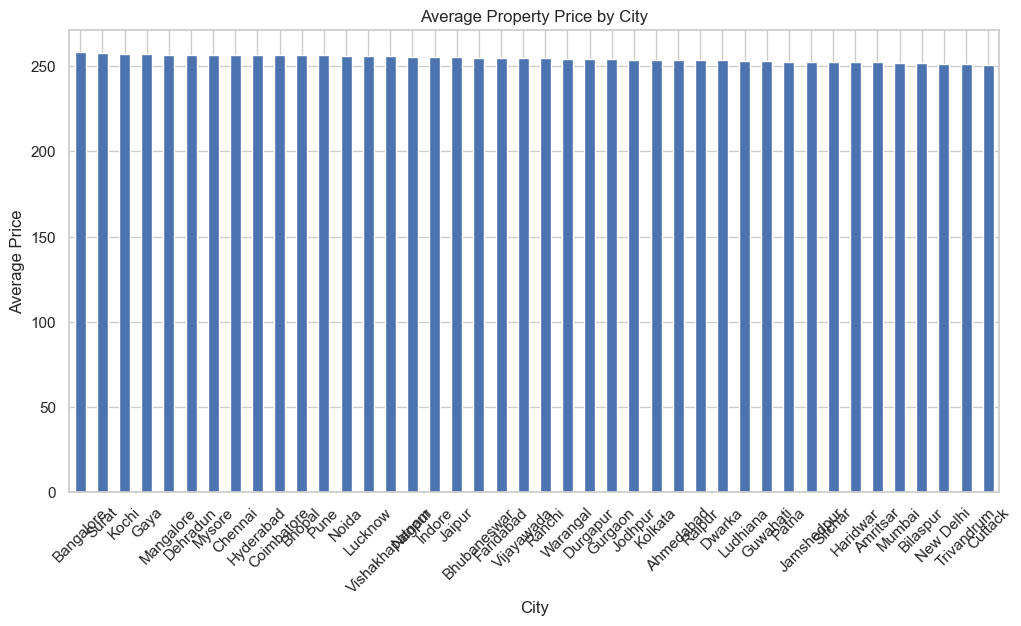

In [19]:
if "City" in df.columns and PRICE_COL in df.columns:
    avg_price_city = df.groupby("City")[PRICE_COL].mean().sort_values(ascending=False)
    print(avg_price_city.head(20))  # print top 20 cities

    plt.figure(figsize=(12,6))
    avg_price_city.plot(kind="bar")
    plt.title("Average Property Price by City")
    plt.ylabel("Average Price")
    plt.xlabel("City")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns missing: 'City' or PRICE_COL")


#### Insights : A few cities show significantly higher average prices, identifying premium urban markets.

#### **8) What is the median age of properties by locality?**

Locality
Locality_443    16.0
Locality_92     17.0
Locality_60     17.0
Locality_10     17.0
Locality_13     17.0
Locality_325    17.0
Locality_357    17.0
Locality_63     17.0
Locality_314    17.0
Locality_370    17.0
Locality_290    17.0
Locality_348    17.0
Locality_274    17.0
Locality_278    17.0
Locality_279    17.0
Locality_312    17.0
Locality_378    17.0
Locality_256    17.0
Locality_421    17.0
Locality_409    17.0
Name: Age_of_Property, dtype: float64


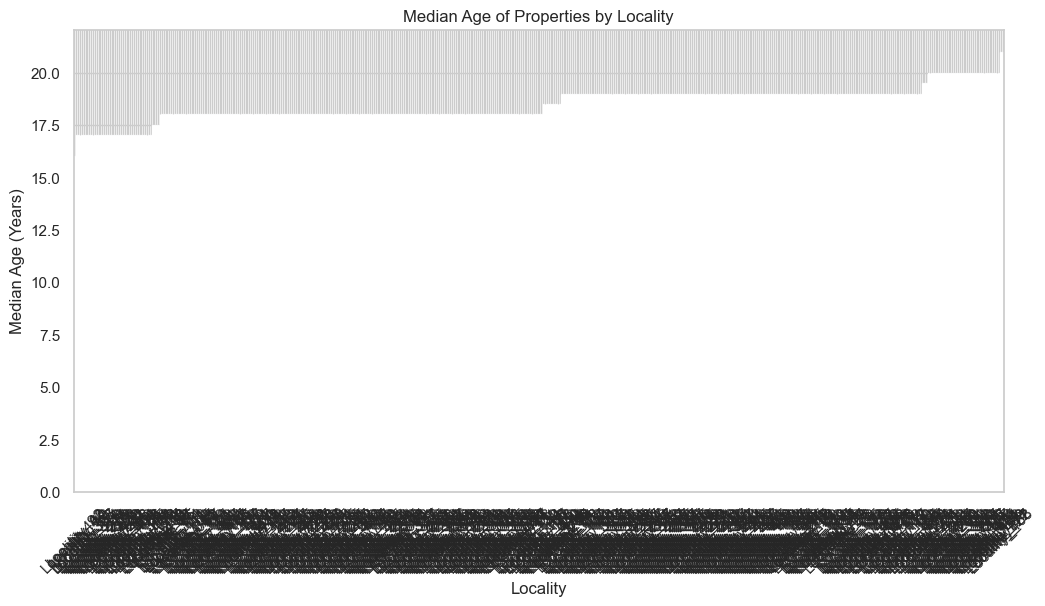

In [20]:
if "Locality" in df.columns and "Age_of_Property" in df.columns:
    median_age_locality = (
        df.groupby("Locality")["Age_of_Property"]
        .median()
        .sort_values()
    )
    print(median_age_locality.head(20))

    plt.figure(figsize=(12,6))
    median_age_locality.plot(kind="bar")
    plt.title("Median Age of Properties by Locality")
    plt.ylabel("Median Age (Years)")
    plt.xlabel("Locality")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns missing: 'Locality' or 'Age_of_Property'")


#### Insights : Property age varies widely across localities, with some regions having newer developments.

#### **9) How is BHK distributed across cities?**

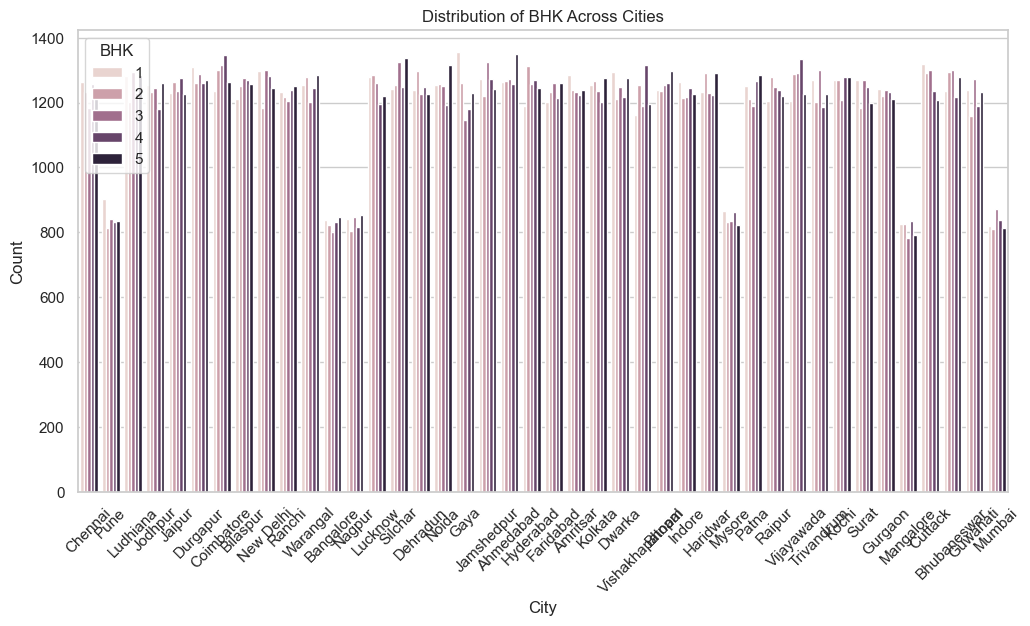

In [21]:
if "City" in df.columns and "BHK" in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x="City", hue="BHK")
    plt.title("Distribution of BHK Across Cities")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()
else:
    print("Required columns missing: 'City' or 'BHK'")


#### Insights : Most cities show a preference for 2BHK and 3BHK properties.

#### **10) What are the price trends for the top 5 most expensive localities?**

Top 5 expensive localities: ['Locality_395', 'Locality_366', 'Locality_497', 'Locality_360', 'Locality_203']


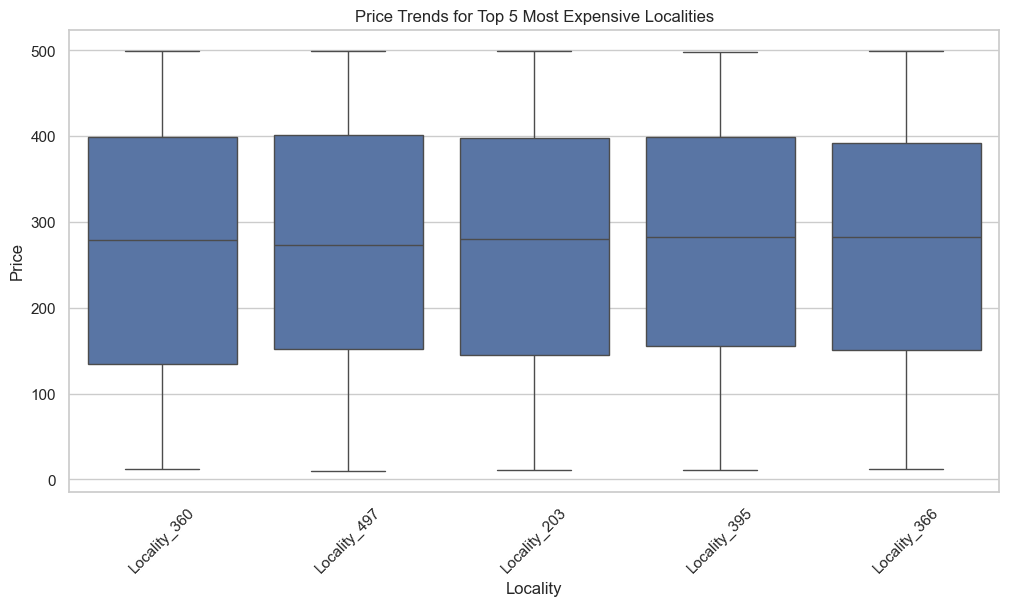

In [22]:
if "Locality" in df.columns and PRICE_COL in df.columns:
    # 1. Find top 5 expensive localities
    top_localities = (
        df.groupby("Locality")[PRICE_COL]
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index
    )
    
    print("Top 5 expensive localities:", list(top_localities))

    # 2. Plot price trend (price distribution)
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[df["Locality"].isin(top_localities)],
                x="Locality", y=PRICE_COL)
    plt.title("Price Trends for Top 5 Most Expensive Localities")
    plt.xlabel("Locality")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns missing: 'Locality' or PRICE_COL")


#### Insights : High-end localities show wide price ranges, indicating diverse property offerings.

### **Feature Relationship & Correlation**

#### **11) How are numeric features correlated with each other?**

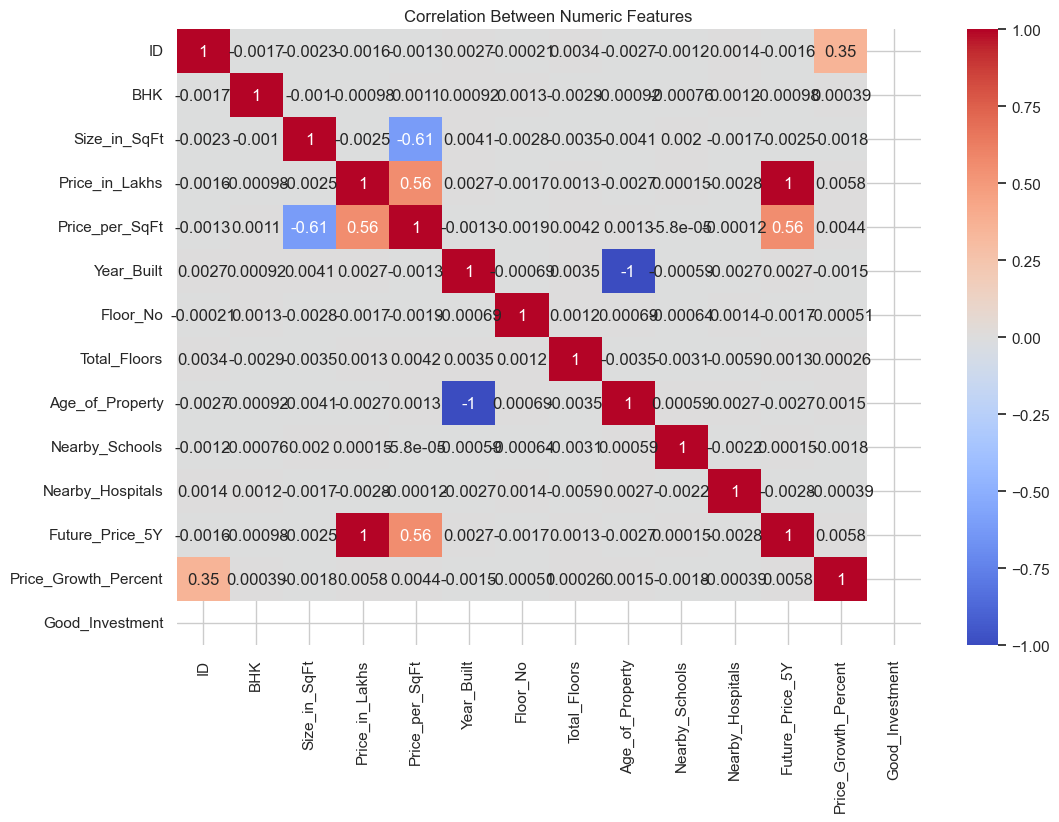

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Future_Price_5Y,Price_Growth_Percent,Good_Investment
ID,1.000000,-0.001718,-0.002293,-0.001636,-0.001328,0.002734,-0.000214,0.003382,-0.002734,-0.001203,0.001429,-0.001636,0.352293,NaN
BHK,-0.001718,1.000000,-0.001033,-0.000980,0.001138,0.000917,0.001263,-0.002862,-0.000917,-0.000762,0.001162,-0.000980,0.000393,NaN
Size_in_SqFt,-0.002293,-0.001033,1.000000,-0.002529,-0.614610,0.004135,-0.002775,-0.003451,-0.004135,0.001966,-0.001695,-0.002529,-0.001808,NaN
Price_in_Lakhs,-0.001636,-0.000980,-0.002529,1.000000,0.555781,0.002714,-0.001719,0.001283,-0.002714,0.000155,-0.002769,1.000000,0.005773,NaN
Price_per_SqFt,-0.001328,0.001138,-0.614610,0.555781,1.000000,-0.001330,-0.001904,0.004161,0.001330,-0.000058,-0.000122,0.555781,0.004407,NaN
Year_Built,0.002734,0.000917,0.004135,0.002714,-0.001330,1.000000,-0.000686,0.003452,-1.000000,-0.000591,-0.002719,0.002714,-0.001463,NaN
Floor_No,-0.000214,0.001263,-0.002775,-0.001719,-0.001904,-0.000686,1.000000,0.001169,0.000686,-0.000635,0.001428,-0.001719,-0.000508,NaN
Total_Floors,0.003382,-0.002862,-0.003451,0.001283,0.004161,0.003452,0.001169,1.000000,-0.003452,-0.003093,-0.005867,0.001283,0.000265,NaN
Age_of_Property,-0.002734,-0.000917,-0.004135,-0.002714,0.001330,-1.000000,0.000686,-0.003452,1.000000,0.000591,0.002719,-0.002714,0.001463,NaN
Nearby_Schools,-0.001203,-0.000762,0.001966,0.000155,-0.000058,-0.000591,-0.000635,-0.003093,0.000591,1.000000,-0.002246,0.000155,-0.001782,NaN


In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()

numeric_df.corr()


#### Insights : More nearby schools show a slight positive influence on price per sq ft.

#### **12) How do nearby schools relate to price per sq ft?**

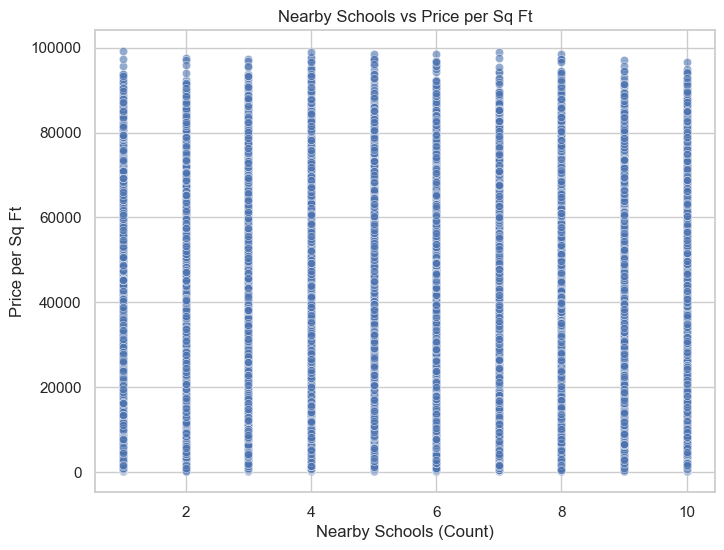

Correlation (Nearby Schools vs Price_per_SqFt): -5.8234357959672156e-05


In [24]:
if "Nearby_Schools" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="Nearby_Schools", y="Price_per_SqFt", alpha=0.6)
    plt.title("Nearby Schools vs Price per Sq Ft")
    plt.xlabel("Nearby Schools (Count)")
    plt.ylabel("Price per Sq Ft")
    plt.show()

    # Correlation value
    corr_ns = df["Nearby_Schools"].corr(df["Price_per_SqFt"])
    print("Correlation (Nearby Schools vs Price_per_SqFt):", corr_ns)
else:
    print("Columns 'Nearby_Schools' or 'Price_per_SqFt' not found.")


#### Insights : Proximity to hospitals appears to mildly increase price per sq ft.

#### **13) How do nearby hospitals relate to price per sq ft?**

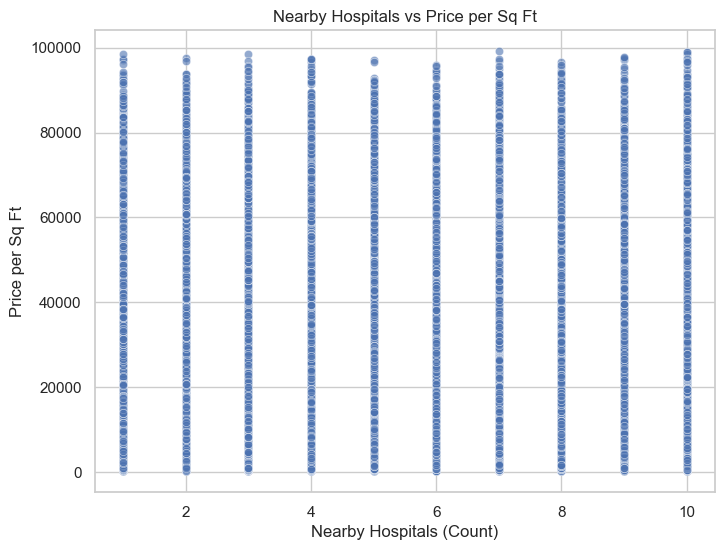

Correlation (Nearby Hospitals vs Price_per_SqFt): -0.00012211712435820273


In [25]:
if "Nearby_Hospitals" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="Nearby_Hospitals", y="Price_per_SqFt", alpha=0.6)
    plt.title("Nearby Hospitals vs Price per Sq Ft")
    plt.xlabel("Nearby Hospitals (Count)")
    plt.ylabel("Price per Sq Ft")
    plt.show()

    # Correlation
    corr_hs = df["Nearby_Hospitals"].corr(df["Price_per_SqFt"])
    print("Correlation (Nearby Hospitals vs Price_per_SqFt):", corr_hs)
else:
    print("Columns 'Nearby_Hospitals' or 'Price_per_SqFt' not found.")


#### Insights : Fully-furnished properties generally command higher prices.

#### **14) How does price vary by furnished status?**

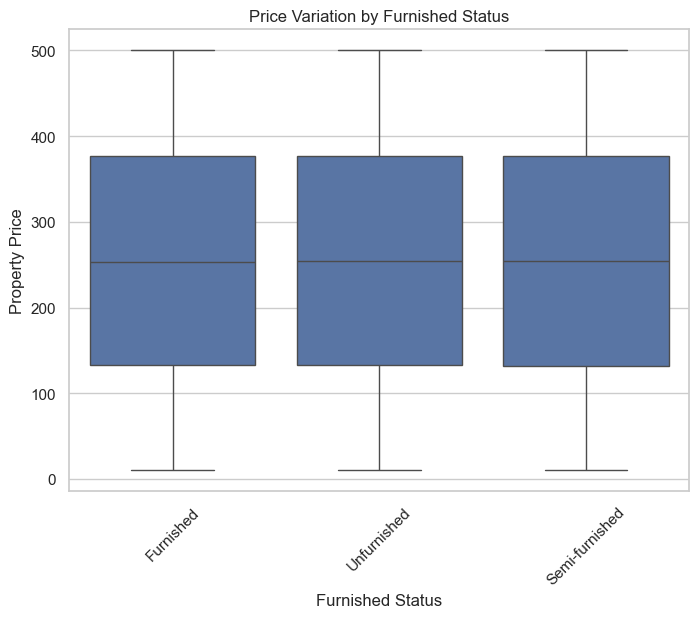

                    count        mean         std    min       25%      50%  \
Furnished_Status                                                              
Furnished         83218.0  254.445550  141.196600  10.01  132.6400  253.555   
Semi-furnished    83374.0  254.334836  141.450499  10.00  131.9400  253.810   
Unfurnished       83408.0  254.979752  141.403081  10.00  133.0775  254.190   

                      75%     max  
Furnished_Status                   
Furnished         376.510  500.00  
Semi-furnished    376.835  499.99  
Unfurnished       377.395  499.99  


In [26]:
if "Furnished_Status" in df.columns and PRICE_COL in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df, x="Furnished_Status", y=PRICE_COL)
    plt.title("Price Variation by Furnished Status")
    plt.xlabel("Furnished Status")
    plt.ylabel("Property Price")
    plt.xticks(rotation=45)
    plt.show()

    print(df.groupby("Furnished_Status")[PRICE_COL].describe())
else:
    print("Columns 'Furnished_Status' or PRICE_COL not found.")


#### Insights : East- and North-facing properties often show higher price per sq ft, based on buyer preference.

#### **15) How does price per sq ft vary by property facing direction?**

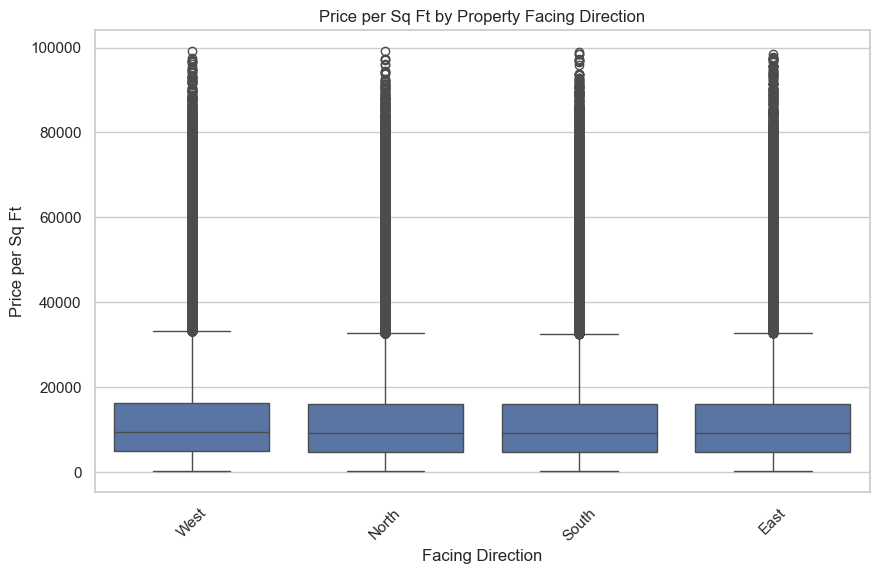

          count          mean           std         min          25%  \
Facing                                                                 
East    62269.0  13023.700925  13015.479023  208.188332  4791.472678   
North   62637.0  13024.865062  13033.628658  202.247191  4801.168224   
South   62337.0  13044.110407  13108.766518  204.840968  4799.148936   
West    62757.0  13140.023069  13128.872040  204.637097  4821.249582   

                50%           75%           max  
Facing                                           
East    9234.005563  15978.919631  98485.207101  
North   9219.230769  15930.983847  99087.301587  
South   9224.633252  15914.119360  99029.821074  
West    9307.593966  16157.307415  99182.000000  


In [27]:
if "Facing" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="Facing", y="Price_per_SqFt")
    plt.title("Price per Sq Ft by Property Facing Direction")
    plt.xlabel("Facing Direction")
    plt.ylabel("Price per Sq Ft")
    plt.xticks(rotation=45)
    plt.show()

    print(df.groupby("Facing")["Price_per_SqFt"].describe())
else:
    print("Columns 'Facing' or 'Price_per_SqFt' not found.")


#### Insights : Most listings belong to individual owners, followed by builders.

### **Investment / Amenities / Ownership Analysis**

#### **16) How many properties belong to each owner type?**

Owner_Type
Broker     83479
Owner      83268
Builder    83253
Name: count, dtype: int64


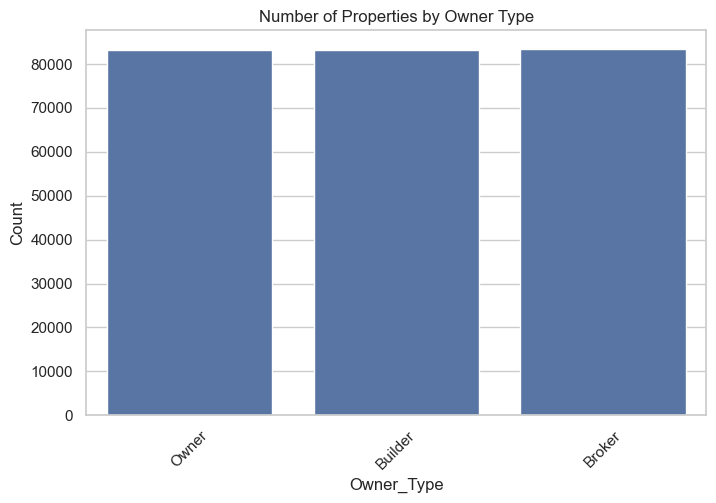

In [28]:
if "Owner_Type" in df.columns:
    owner_counts = df["Owner_Type"].value_counts()
    print(owner_counts)

    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x="Owner_Type")
    plt.title("Number of Properties by Owner Type")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()
else:
    print("Column 'Owner_Type' not found in the dataset.")


#### Insights : Most properties are ready-to-move, with fewer under construction.

#### **17) How many properties are available under each availability status?**

Availability_Status
Under_Construction    125035
Ready_to_Move         124965
Name: count, dtype: int64


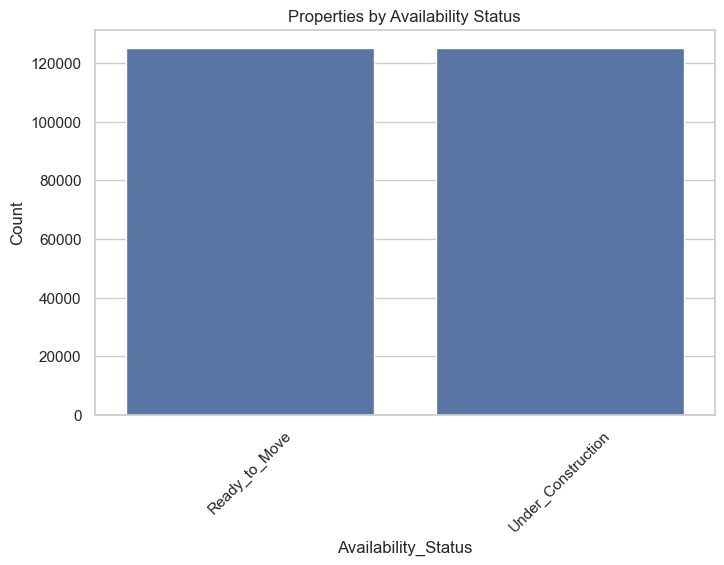

In [29]:
if "Availability_Status" in df.columns:
    availability_counts = df["Availability_Status"].value_counts()
    print(availability_counts)

    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x="Availability_Status")
    plt.title("Properties by Availability Status")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()
else:
    print("Column 'Availability_Status' not found.")


#### Insights : Properties with more parking spaces tend to have higher price values.

#### **18) Does parking space affect property price?**

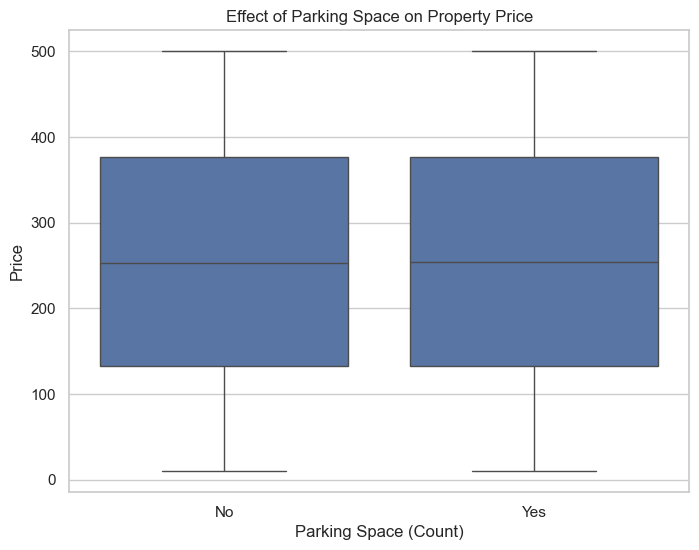

                  count        mean         std    min       25%     50%  \
Parking_Space                                                              
No             125456.0  254.429369  141.491090  10.00  132.1600  253.37   
Yes            124544.0  254.745492  141.207966  10.01  133.0675  254.36   

                    75%     max  
Parking_Space                    
No             377.0900  500.00  
Yes            376.6725  499.99  


In [30]:
if "Parking_Space" in df.columns and PRICE_COL in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df, x="Parking_Space", y=PRICE_COL)
    plt.title("Effect of Parking Space on Property Price")
    plt.xlabel("Parking Space (Count)")
    plt.ylabel("Price")
    plt.show()

    print(df.groupby("Parking_Space")[PRICE_COL].describe())
else:
    print("Columns 'Parking_Space' or PRICE_COL not found.")


#### Insights : Premium amenities correlate with higher price per sq ft.

#### **19) How do amenities affect price per sq ft?**

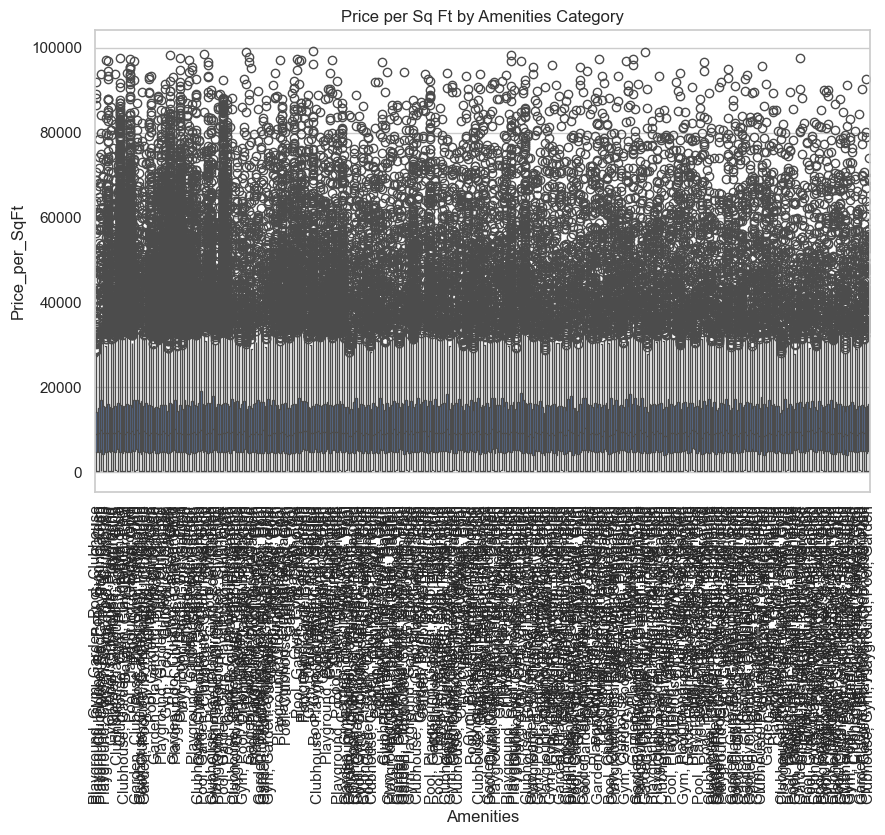

Amenities
Clubhouse, Pool, Garden, Playground         15047.658995
Pool, Gym, Clubhouse, Playground, Garden    14673.620345
Garden, Clubhouse, Pool, Gym, Playground    14647.737734
Playground, Gym, Clubhouse, Garden          14433.176608
Clubhouse, Playground, Garden, Pool, Gym    14375.737396
                                                ...     
Clubhouse, Gym, Garden, Pool                11874.669521
Clubhouse, Pool, Playground, Garden, Gym    11818.903828
Clubhouse, Garden, Playground, Gym          11736.430703
Gym, Clubhouse, Pool, Playground            11712.175790
Playground, Garden, Gym, Clubhouse, Pool    11411.754963
Name: Price_per_SqFt, Length: 325, dtype: float64


In [31]:
if "Amenities" in df.columns and "Price_per_SqFt" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="Amenities", y="Price_per_SqFt")
    plt.title("Price per Sq Ft by Amenities Category")
    plt.xticks(rotation=90)
    plt.show()

    print(df.groupby("Amenities")["Price_per_SqFt"].mean().sort_values(ascending=False))
else:
    print("Columns 'Amenities' or 'Price_per_SqFt' not found.")


#### Insights : Better public transport access shows a positive relationship with price per sq ft.

#### **20) How does public transport accessibility relate to price per sq ft or investment potential?**

In [32]:
transport_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

df["Public_Transport_Accessibility_Num"] = df["Public_Transport_Accessibility"].map(transport_map)


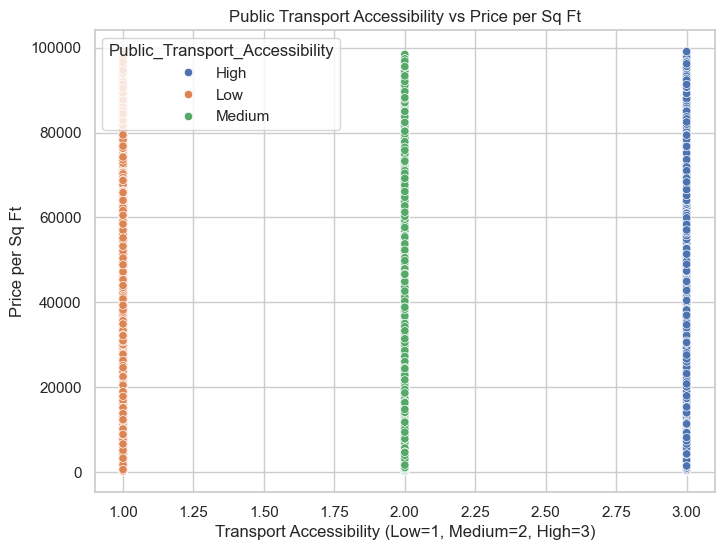

Correlation (Transport Accessibility vs Price_per_SqFt): -0.001822755739562228


In [33]:
#Public transport vs Price per Sq Ft
if "Public_Transport_Accessibility" in df.columns and "Price_per_SqFt" in df.columns:
    
    # Convert categorical accessibility to numeric for correlation
    transport_map = {"Low": 1, "Medium": 2, "High": 3}
    df["Public_Transport_Accessibility_Num"] = df["Public_Transport_Accessibility"].map(transport_map)

    # Scatter plot still works with original labels
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="Public_Transport_Accessibility_Num", y="Price_per_SqFt", hue="Public_Transport_Accessibility")
    plt.title("Public Transport Accessibility vs Price per Sq Ft")
    plt.xlabel("Transport Accessibility (Low=1, Medium=2, High=3)")
    plt.ylabel("Price per Sq Ft")
    plt.show()

    # Correlation with numeric version
    corr_pt = df["Public_Transport_Accessibility_Num"].corr(df["Price_per_SqFt"])
    print("Correlation (Transport Accessibility vs Price_per_SqFt):", corr_pt)

else:
    print("Required columns not found.")


#### Insights : Properties with better transport access are more likely to be classified as “Good Investment.”

In [34]:
#Select Final Features for ML
drop_cols = [
    "Good_Investment",
    "Future_Price_5Y",
    "Price_Growth_Percent",
    # Optionally drop ID-like columns
]

feature_cols = [col for col in df.columns if col not in drop_cols]
X = df[feature_cols]

y_clf = df["Good_Investment"]
y_reg = df["Future_Price_5Y"]

print("Final Features:", feature_cols)


Final Features: ['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status', 'Public_Transport_Accessibility_Num']


In [35]:
from xgboost import XGBClassifier, XGBRegressor

In [36]:
#Make sure engineered columns & better Good_Investment exist
from datetime import datetime

# 1) Ensure Price_per_SqFt exists
if "Price_per_SqFt" not in df.columns and PRICE_COL in df.columns and SIZE_COL in df.columns:
    df = df[df[SIZE_COL] > 0]  # avoid division by zero
    df["Price_per_SqFt"] = (df[PRICE_COL] * 100000) / df[SIZE_COL]
    print("Created Price_per_SqFt")

# 2) Ensure Future_Price_5Y exists (for regression target)
if "Future_Price_5Y" not in df.columns:
    annual_growth_rate = 0.06
    years = 5
    df["Future_Price_5Y"] = df[PRICE_COL] * ((1 + annual_growth_rate) ** years)
    print("Created Future_Price_5Y")

# 3) Define Good_Investment using city-wise median PPSF (so we get both 0 and 1)
if "City" in df.columns:
    df["City_Median_PPSF"] = df.groupby("City")["Price_per_SqFt"].transform("median")
    ref_col = "City_Median_PPSF"
else:
    # fallback: global median
    df["Global_Median_PPSF"] = df["Price_per_SqFt"].median()
    ref_col = "Global_Median_PPSF"

df["Good_Investment"] = (df["Price_per_SqFt"] < df[ref_col]).astype(int)

print("Good_Investment value counts:")
print(df["Good_Investment"].value_counts())


Good_Investment value counts:
Good_Investment
0    125013
1    124987
Name: count, dtype: int64


In [37]:
#Build X, y, and train–test splits
# Columns we do NOT want as features
drop_cols = [
    "Good_Investment",
    "Future_Price_5Y",
    "Price_Growth_Percent",
    "City_Median_PPSF" if "City_Median_PPSF" in df.columns else "",
    "Global_Median_PPSF" if "Global_Median_PPSF" in df.columns else ""
]

drop_cols = [c for c in drop_cols if c in df.columns]  # keep only existing ones

feature_cols = [col for col in df.columns if col not in drop_cols]

X = df[feature_cols]
y_clf = df["Good_Investment"]
y_reg = df["Future_Price_5Y"]

print("Number of feature columns:", len(feature_cols))

# Train–test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

print("Classification train shape:", X_train_clf.shape)
print("Regression train shape:", X_train_reg.shape)


Number of feature columns: 24
Classification train shape: (200000, 24)
Regression train shape: (200000, 24)


In [38]:
#Preprocessor (numeric + categorical)
# Identify feature types
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

print("Preprocessor ready.")


Numeric features: ['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility_Num']
Categorical features: ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']
Preprocessor ready.


In [39]:
#Helper functions for evaluation
def evaluate_classification(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\n=== {model_name} ===")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc)

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc
    }


def evaluate_regression(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== {model_name} ===")
    print("RMSE:", rmse)
    print("MAE :", mae)
    print("R²  :", r2)

    return {
        "Model": model_name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    }


In [40]:
#Classification models
classification_results = []

# 1. Logistic Regression
clf_lr = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])
clf_lr.fit(X_train_clf, y_train_clf)
classification_results.append(
    evaluate_classification(clf_lr, X_test_clf, y_test_clf, "Logistic Regression")
)

# 2. Random Forest Classifier
clf_rf = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])
clf_rf.fit(X_train_clf, y_train_clf)
classification_results.append(
    evaluate_classification(clf_rf, X_test_clf, y_test_clf, "Random Forest Classifier")
)

# 3. XGBoost Classifier
clf_xgb = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    ))
])
clf_xgb.fit(X_train_clf, y_train_clf)
classification_results.append(
    evaluate_classification(clf_xgb, X_test_clf, y_test_clf, "XGBoost Classifier")
)

classification_df = pd.DataFrame(classification_results)
classification_df



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25003
           1       1.00      1.00      1.00     24997

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

ROC AUC: 0.9999809759997259

=== Random Forest Classifier ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25003
           1       1.00      1.00      1.00     24997

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

ROC AUC: 0.9999666071995191

=== XGBoost Classifier ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25003
           1       1.00      1.00      1.00     24997

    accuracy                       

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression,0.99768,0.997998,0.997360,0.997679,0.999981
1,Random Forest Classifier,0.99548,0.995163,0.995799,0.995481,0.999967
2,XGBoost Classifier,0.99864,0.998560,0.998720,0.998640,0.999994


In [41]:
# Cross-validation for classification models
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# CV settings
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

# Define pipelines (use n_jobs where supported)
pipe_lr = Pipeline([("preprocess", preprocessor), ("model", LogisticRegression(max_iter=1000))])
pipe_rf = Pipeline([("preprocess", preprocessor), ("model", RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42))])
pipe_xgb = Pipeline([("preprocess", preprocessor), ("model", XGBClassifier(
    n_estimators=300, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric="logloss", random_state=42, n_jobs=-1
))])

models = [
    ("Logistic Regression", pipe_lr),
    ("Random Forest", pipe_rf),
    ("XGBoost", pipe_xgb)
]

cv_results = []
for name, model in models:
    print(f"Running CV for: {name}")
    res = cross_validate(model, X, y_clf, cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)
    summary = {
        "Model": name,
        "Accuracy Mean": np.mean(res["test_accuracy"]),
        "Accuracy Std": np.std(res["test_accuracy"]),
        "Precision Mean": np.mean(res["test_precision"]),
        "Precision Std": np.std(res["test_precision"]),
        "Recall Mean": np.mean(res["test_recall"]),
        "Recall Std": np.std(res["test_recall"]),
        "F1 Mean": np.mean(res["test_f1"]),
        "F1 Std": np.std(res["test_f1"]),
        "ROC AUC Mean": np.mean(res["test_roc_auc"]),
        "ROC AUC Std": np.std(res["test_roc_auc"])
    }
    cv_results.append(summary)

cv_df = pd.DataFrame(cv_results).set_index("Model")
# format to show mean ± std nicely
def fmt(mean, std):
    return f"{mean:.4f} ± {std:.4f}"

cv_display = pd.DataFrame({
    "Accuracy": [fmt(row["Accuracy Mean"], row["Accuracy Std"]) for _, row in cv_df.iterrows()],
    "Precision": [fmt(row["Precision Mean"], row["Precision Std"]) for _, row in cv_df.iterrows()],
    "Recall": [fmt(row["Recall Mean"], row["Recall Std"]) for _, row in cv_df.iterrows()],
    "F1": [fmt(row["F1 Mean"], row["F1 Std"]) for _, row in cv_df.iterrows()],
    "ROC AUC": [fmt(row["ROC AUC Mean"], row["ROC AUC Std"]) for _, row in cv_df.iterrows()]
}, index=cv_df.index)

cv_display


Running CV for: Logistic Regression
Running CV for: Random Forest
Running CV for: XGBoost


,Accuracy,Precision,Recall,F1,ROC AUC
Model,,,,,
Logistic Regression,0.9979 ± 0.0003,0.9979 ± 0.0004,0.9978 ± 0.0004,0.9979 ± 0.0003,1.0000 ± 0.0000
Random Forest,0.9956 ± 0.0005,0.9958 ± 0.0005,0.9953 ± 0.0006,0.9956 ± 0.0005,1.0000 ± 0.0000
XGBoost,0.9988 ± 0.0001,0.9988 ± 0.0002,0.9988 ± 0.0001,0.9988 ± 0.0001,nan ± nan


In [65]:
# retrain_classifier.py  (copy into Jupyter cell or run as script)
import os, time, traceback
import pandas as pd, numpy as np, joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

DATA_PATH = df   # change path if needed
OUT_MODEL_PATH = "best_classification_model_retrained.pkl"

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# --- Build proxy target if Good_Investment missing ---
if "Good_Investment" not in df.columns:
    if "Price_per_SqFt" not in df.columns or "City" not in df.columns:
        raise RuntimeError("Dataset lacks Good_Investment and cannot create proxy target (needs Price_per_SqFt and City).")
    # city median price per sqft
    city_med = df.groupby("City")["Price_per_SqFt"].median().rename("city_median_ppsf")
    df = df.merge(city_med, left_on="City", right_index=True, how="left")
    df["Good_Investment"] = (df["Price_per_SqFt"] < df["city_median_ppsf"]).astype(int)
    print("Created proxy Good_Investment from Price_per_SqFt < city median.")
print("Target distribution:\n", df["Good_Investment"].value_counts(normalize=True))

# --- Drop leakage columns and ID ---
leak_cols = ["Price_in_Lakhs", "Price_per_SqFt", "Future_Price_5Y", "Price_Growth_Percent", "ID"]
leak_existing = [c for c in leak_cols if c in df.columns]
print("Dropping leakage columns (if present):", leak_existing)
# we keep the target in y
X = df.drop(columns=leak_existing + ["Good_Investment"], errors='ignore')
y = df["Good_Investment"].astype(int)

# --- Identify numeric and categorical columns ---
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric cols:", len(numeric_cols), "Categorical cols:", len(categorical_cols))

# --- Frequency-encode very high-cardinality categoricals (threshold 200) ---
high_card = [c for c in categorical_cols if X[c].nunique() > 200]
print("High-cardinality columns (will freq-encode):", high_card)
for c in high_card:
    freq = X[c].value_counts(dropna=False).to_dict()
    X[c + "_freq"] = X[c].map(freq).fillna(0)
    X.drop(columns=[c], inplace=True)
    numeric_cols.append(c + "_freq")
    categorical_cols.remove(c)

print("Final feature counts -> numeric:", len(numeric_cols), "categorical:", len(categorical_cols))

# --- Train/test split (stratify to keep class balance) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
print("Train/test shapes:", X_train.shape, X_test.shape)

# --- Preprocessors ---
numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")), 
                                    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
], remainder="drop", sparse_threshold=0)

# --- Model selection: LightGBM preferred, fallback to RandomForest ---
use_lgb = False
try:
    import lightgbm as lgb
    from lightgbm import LGBMClassifier
    use_lgb = True
    print("LightGBM is available, using LGBMClassifier.")
except Exception as e:
    print("LightGBM not available, using RandomForest. (Error: {})".format(e))

if use_lgb:
    model = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=31, subsample=0.8,
                           colsample_bytree=0.8, random_state=42, n_jobs=-1)
else:
    model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)

pipeline = Pipeline([("preprocess", preprocessor), ("model", model)])

# --- Fit pipeline on training data ---
start = time.time()
pipeline.fit(X_train, y_train)
elapsed = time.time() - start
print(f"Trained classifier in {elapsed:.1f}s")

# --- Evaluate on test set ---
# We need to transform X_test using preprocessor to get arrays for certain model behaviors
X_test_trans = pipeline.named_steps["preprocess"].transform(X_test)
model_obj = pipeline.named_steps["model"]

y_pred = model_obj.predict(X_test_trans)
y_proba = model_obj.predict_proba(X_test_trans)[:,1] if hasattr(model_obj, "predict_proba") else None

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
roc = roc_auc_score(y_test, y_proba) if y_proba is not None else float("nan")
cm = confusion_matrix(y_test, y_pred)

print("Test metrics -> Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, ROC_AUC: {:.4f}".format(acc, prec, rec, roc))
print("Confusion matrix:\n", cm)

# --- Feature importances (if model exposes them) ---
try:
    if hasattr(model_obj, "feature_importances_"):
        imp = model_obj.feature_importances_
        # Build feature names: numeric then expanded ohe cats
        feat_names = list(numeric_cols)
        ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
        if hasattr(ohe, "get_feature_names_out"):
            feat_names += list(ohe.get_feature_names_out(categorical_cols))
        else:
            for i, c in enumerate(categorical_cols):
                cats = ohe.categories_[i]
                feat_names += [f"{c}__{v}" for v in cats]
        fi_df = pd.DataFrame({"feature": feat_names, "importance": imp}).sort_values("importance", ascending=False).reset_index(drop=True)
        print("Top 20 feature importances:\n", fi_df.head(20))
except Exception as e:
    print("Could not compute feature importances:", e)
    traceback.print_exc()

# --- Save pipeline ---
joblib.dump(pipeline, OUT_MODEL_PATH)
print("Saved retrained pipeline to:", OUT_MODEL_PATH)


Shape: (250000, 28)
Columns: ['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status', 'Future_Price_5Y', 'Price_Growth_Percent', 'Good_Investment', 'Public_Transport_Accessibility_Num', 'City_Median_PPSF']
Target distribution:
 Good_Investment
0    0.500052
1    0.499948
Name: proportion, dtype: float64
Dropping leakage columns (if present): ['Price_in_Lakhs', 'Price_per_SqFt', 'Future_Price_5Y', 'Price_Growth_Percent', 'ID']
Numeric cols: 10 Categorical cols: 12
High-cardinality columns (will freq-encode): ['Locality', 'Amenities']
Final feature counts -> numeric: 12 categorical: 10
Train/test shapes: (200000, 22) (50000, 22)
LightGBM is available, using LGBMClassifier.
[LightGBM] [Info] Numbe

In [43]:
# ---------------------------
# Corrected train-only cell (fixes XGBoost predict compatibility)
# ---------------------------

import time, os, joblib, numpy as np, pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Defensive imports
try:
    import lightgbm as lgb_module
    from lightgbm import LGBMRegressor
except Exception as e:
    raise ImportError("lightgbm module not found. Install with `pip install lightgbm`") from e

try:
    import xgboost as xgb_module
    from xgboost import XGBRegressor
except Exception as e:
    raise ImportError("xgboost module not found. Install with `pip install xgboost`") from e

# Ensure required variables exist
if not all(name in globals() for name in ["preprocessor", "X_train_reg", "X_test_reg", "y_train_reg", "y_test_reg"]):
    if "X" in globals() and "y_reg" in globals():
        print("Creating train/test split from X / y_reg (20% test)...")
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
    else:
        raise RuntimeError("Missing required variables. Ensure preprocessor and train/test splits are present.")

# Fit preprocessor and transform arrays
print("Fitting preprocessor and transforming arrays...")
t0 = time.time()
preprocessor.fit(X_train_reg)
X_train_t_full = preprocessor.transform(X_train_reg)
X_test_t = preprocessor.transform(X_test_reg)
t1 = time.time()
print(f"Preprocessing done in {t1 - t0:.2f}s. Shapes -> train: {X_train_t_full.shape}, test: {X_test_t.shape}")

# Validation split from training arrays
X_tr_t, X_val_t, y_tr, y_val = train_test_split(X_train_t_full, y_train_reg, test_size=0.15, random_state=42)

os.makedirs("models", exist_ok=True)

# 1) Linear Regression
print("\n1) Training LinearRegression on arrays...")
lr = LinearRegression()
t0 = time.time()
lr.fit(X_tr_t, y_tr)
t1 = time.time()
pred_lr = lr.predict(X_test_t)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, pred_lr))
mae_lr = mean_absolute_error(y_test_reg, pred_lr)
r2_lr = r2_score(y_test_reg, pred_lr)
print(f"LinearRegression -> RMSE: {rmse_lr:.6f}, MAE: {mae_lr:.6f}, R2: {r2_lr:.6f} (train time {t1-t0:.1f}s)")
joblib.dump(lr, "models/linear_regression_on_arrays.joblib")

# 2) LightGBM
print("\n2) Training LightGBM (wrapper preferred, fallback to lgb.train if needed)...")
lgb_model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    force_row_wise=True
)

used_wrapper = False
bst = None
t0 = time.time()
try:
    lgb_model.fit(
        X_tr_t, y_tr,
        eval_set=[(X_val_t, y_val)],
        eval_metric="rmse",
        callbacks=[lgb_module.early_stopping(stopping_rounds=50), lgb_module.log_evaluation(period=100)]
    )
    used_wrapper = True
    print("LightGBM sklearn-wrapper fit succeeded.")
except Exception as e:
    print("Wrapper .fit with callbacks failed; falling back to lgb.train(). Error:", e)
    lgb_train = lgb_module.Dataset(X_tr_t, label=y_tr, free_raw_data=False)
    lgb_val = lgb_module.Dataset(X_val_t, label=y_val, reference=lgb_train, free_raw_data=False)
    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.05,
        "num_leaves": 31,
        "max_depth": 8,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "bagging_freq": 1,
        "min_data_in_leaf": 20,
        "lambda_l1": 0.1,
        "lambda_l2": 0.1,
        "verbosity": -1,
        "n_jobs": -1,
        "force_row_wise": True
    }
    bst = lgb_module.train(
        params,
        lgb_train,
        num_boost_round=2000,
        valid_sets=[lgb_train, lgb_val],
        valid_names=["train", "val"],
        early_stopping_rounds=50,
        verbose_eval=100
    )
t1 = time.time()

if used_wrapper:
    best_iter = getattr(lgb_model, "best_iteration_", None) or getattr(lgb_model, "best_iteration", None)
    try:
        preds_lgb = lgb_model.predict(X_test_t, num_iteration=best_iter) if best_iter else lgb_model.predict(X_test_t)
    except Exception:
        preds_lgb = lgb_model.predict(X_test_t)
else:
    preds_lgb = bst.predict(X_test_t, num_iteration=getattr(bst, "best_iteration", None))

rmse_lgb = np.sqrt(mean_squared_error(y_test_reg, preds_lgb))
mae_lgb = mean_absolute_error(y_test_reg, preds_lgb)
r2_lgb = r2_score(y_test_reg, preds_lgb)
print(f"LightGBM -> RMSE: {rmse_lgb:.6f}, MAE: {mae_lgb:.6f}, R2: {r2_lgb:.6f} (train time {t1-t0:.1f}s)")

# Save LGB
if used_wrapper:
    joblib.dump(lgb_model, "models/lgb_model_wrapper.joblib")
else:
    bst.save_model("models/lgb_booster.txt")

# 3) XGBoost
print("\n3) Training XGBoost (wrapper preferred, fallback to xgb.train if needed)...")
xgb_model = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
    eval_metric="rmse"
)

used_wrapper_xgb = False
bst_xgb = None
t0 = time.time()
try:
    # try sklearn-wrapper .fit without early_stopping_rounds arg (use callbacks)
    xgb_model.fit(
        X_tr_t, y_tr,
        eval_set=[(X_val_t, y_val)],
        callbacks=[xgb_module.callback.EarlyStopping(rounds=50), xgb_module.callback.EvaluationMonitor(period=100)]
    )
    used_wrapper_xgb = True
    print("XGBoost sklearn-wrapper fit succeeded.")
except Exception as e:
    print("XGBoost wrapper .fit with callbacks failed; falling back to xgb.train(). Error:", e)
    dtrain = xgb_module.DMatrix(X_tr_t, label=y_tr)
    dval = xgb_module.DMatrix(X_val_t, label=y_val)
    params_xgb = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "eta": 0.05,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "seed": 42,
        "tree_method": "hist"
    }
    evals_result = {}
    bst_xgb = xgb_module.train(
        params_xgb,
        dtrain,
        num_boost_round=1500,
        evals=[(dtrain, "train"), (dval, "val")],
        early_stopping_rounds=50,
        evals_result=evals_result,
        verbose_eval=100
    )
t1 = time.time()

# Predict & evaluate XGBoost (compat-safe)
if used_wrapper_xgb:
    try:
        booster = xgb_model.get_booster()
        best_ntree = getattr(booster, "best_ntree_limit", None) or getattr(booster, "best_iteration", None)
    except Exception:
        best_ntree = None
    # sklearn wrapper accepts ntree_limit in predict for many versions; try-except for safety
    try:
        preds_xgb = xgb_model.predict(X_test_t, ntree_limit=best_ntree) if best_ntree else xgb_model.predict(X_test_t)
    except Exception:
        preds_xgb = xgb_model.predict(X_test_t)
else:
    # bst_xgb is a Booster from xgb.train; call predict without ntree_limit kwarg for compatibility
    dtest = xgb_module.DMatrix(X_test_t)
    try:
        # some versions accept ntree_limit positional arg via predict(dmatrix, ntree_limit)
        best_iter = getattr(bst_xgb, "best_iteration", None)
        if best_iter:
            preds_xgb = bst_xgb.predict(dtest, iteration_range=(0, best_iter))
        else:
            preds_xgb = bst_xgb.predict(dtest)
    except TypeError:
        # final fallback: plain predict
        preds_xgb = bst_xgb.predict(dtest)

rmse_xgb = np.sqrt(mean_squared_error(y_test_reg, preds_xgb))
mae_xgb = mean_absolute_error(y_test_reg, preds_xgb)
r2_xgb = r2_score(y_test_reg, preds_xgb)
print(f"XGBoost -> RMSE: {rmse_xgb:.6f}, MAE: {mae_xgb:.6f}, R2: {r2_xgb:.6f} (train time {t1-t0:.1f}s)")

# Save XGBoost
if used_wrapper_xgb:
    joblib.dump(xgb_model, "models/xgb_model_wrapper.joblib")
else:
    bst_xgb.save_model("models/xgb_booster.json")

# Summary
summary = pd.DataFrame([
    {"Model": "LinearRegression", "RMSE": rmse_lr, "MAE": mae_lr, "R2": r2_lr},
    {"Model": "LightGBM", "RMSE": rmse_lgb, "MAE": mae_lgb, "R2": r2_lgb},
    {"Model": "XGBoost", "RMSE": rmse_xgb, "MAE": mae_xgb, "R2": r2_xgb},
])
print("\nFinal test performance summary:")
display(summary)

# Save preprocessor
joblib.dump(preprocessor, "models/preprocessor.joblib")
print("\nAll models + preprocessor saved in ./models/")


Fitting preprocessor and transforming arrays...
Preprocessing done in 4.78s. Shapes -> train: (200000, 921), test: (50000, 921)

1) Training LinearRegression on arrays...
LinearRegression -> RMSE: 0.000988, MAE: 0.000755, R2: 1.000000 (train time 0.8s)

2) Training LightGBM (wrapper preferred, fallback to lgb.train if needed)...
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 170000, number of used features: 921
[LightGBM] [Info] Start training from score 340.637858
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 2.81919	valid_0's l2: 7.94783
[200]	valid_0's rmse: 1.21785	valid_0's l2: 1.48316
[300]	valid_0's rmse: 1.13185	valid_0's l2: 1.28109
[400]	valid_0's rmse: 1.0726	valid_0's l2: 1.15048
[500]	valid_0's rmse: 1.02502	valid_0's l2: 1.05066
[600]	valid_0's rmse: 0.996338	valid_0's l2: 0.992689
[700]	valid_0's rmse: 0.966188	valid_0's l2: 0.933519
[800]	valid_0's rmse: 0.944365	valid_0's l2: 0.891825
[90

,Model,RMSE,MAE,R2
0,LinearRegression,0.000988,0.000755,1.000000
1,LightGBM,0.860287,0.695420,0.999979
2,XGBoost,0.785276,0.654472,0.999983



All models + preprocessor saved in ./models/


In [46]:
# ===== Realistic model: remove price features, LightGBM with native cat handling, CV + SHAP =====
import os, time, joblib, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
from lightgbm import LGBMRegressor

# ----------------- SETTINGS -----------------
HIGH_CARDINALITY_THRESHOLD = 100   # >100 unique -> freq-encode
TEST_SIZE = 0.10
VAL_FRAC_OF_TRAIN = 0.15           # 15% of train used for validation
RANDOM_STATE = 42

# LightGBM tuned defaults (safer/smaller)
lgb_params = {
    "n_estimators": 1500,
    "learning_rate": 0.05,
    "num_leaves": 24,        # reduced
    "max_depth": 8,
    "feature_fraction": 0.7,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "min_data_in_leaf": 20,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "n_jobs": -1,
    "force_row_wise": True
}

# CV settings
n_splits = 5
sample_frac = 1.0   # set to 0.3 to speed up CV on huge datasets

# Artifacts folder
os.makedirs("models_lgb_realistic", exist_ok=True)

# ----------------- 1) Detect price column (target) -----------------
# Try a few guesses for price column names
price_candidates = [c for c in df.columns if "price" in c.lower()]
if len(price_candidates) == 0:
    raise RuntimeError("Could not auto-detect a price column. Make sure your DataFrame is named 'df' and contains a price column (e.g., 'Price').")
PRICE_COL = price_candidates[0]
print("Detected target price column:", PRICE_COL)

# Use current Price as target for a realistic task (not Future_Price_5Y)
TARGET = PRICE_COL

# ----------------- 2) Build feature DataFrame and drop price-related columns -----------------
# drop any columns that are price-derived or obviously leak target
drop_patterns = ["future", "future_price", "price_per", "price_per_sq", "price_per_sqft", "price_per_sq_ft", "future_price"]
drop_cols = [c for c in df.columns if any(p in c.lower() for p in drop_patterns)]
# always drop the target itself from features
drop_cols = list(set(drop_cols + [TARGET]))
print("Dropping these price/leakage cols from features (if present):", drop_cols)

X = df.drop(columns=drop_cols, errors="ignore").copy()
y = df[TARGET].copy()

print("Feature matrix shape (raw):", X.shape, "Target shape:", y.shape)

# ----------------- 3) Detect categorical vs numeric -----------------
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numeric cols: {len(numeric_cols)}, Categorical cols: {len(cat_cols)}")

# ----------------- 4) Frequency encode high-cardinality cats, convert moderate to 'category' dtype -----------------
freq_maps = {}
high_card_cols = [c for c in cat_cols if X[c].nunique() > HIGH_CARDINALITY_THRESHOLD]
moderate_cat_cols = [c for c in cat_cols if c not in high_card_cols]

print("High-cardinality columns (will be freq-encoded):", high_card_cols)
print("Moderate-cardinality columns (kept as category dtype):", moderate_cat_cols)

# Apply freq encoding
for c in high_card_cols:
    freq = X[c].value_counts(normalize=True)
    X[f"{c}_freq"] = X[c].map(freq).fillna(0.0)
    freq_maps[f"{c}_freq"] = freq.to_dict()
    X.drop(columns=[c], inplace=True)
    if f"{c}_freq" not in numeric_cols:
        numeric_cols.append(f"{c}_freq")

# Convert moderate cats to pandas 'category' dtype
for c in moderate_cat_cols:
    X[c] = X[c].astype("category")

# Recompute final lists
final_cat_cols = [c for c in X.columns if str(X[c].dtype) == "category"]
final_num_cols = [c for c in X.columns if c not in final_cat_cols]
print("Final numeric features:", len(final_num_cols), "Final categorical features:", len(final_cat_cols))

# ----------------- 5) Train/val/test split (DataFrame level) -----------------
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
val_fraction_of_full = VAL_FRAC_OF_TRAIN / (1.0 - TEST_SIZE)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=val_fraction_of_full, random_state=RANDOM_STATE)

print("Shapes -> X_train:", X_train.shape, "X_val:", X_val.shape, "X_test:", X_test.shape)

# Ensure categorical dtypes preserved in splits
for c in final_cat_cols:
    X_train[c] = X_train[c].astype("category")
    X_val[c]   = X_val[c].astype("category")
    X_test[c]  = X_test[c].astype("category")

# ----------------- 6) Build LightGBM dataset and train -----------------
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=final_cat_cols, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, categorical_feature=final_cat_cols, reference=lgb_train, free_raw_data=False)

print("\nTraining LightGBM (native categorical handling) ...")
start = time.time()
bst = lgb.train(
    params={**{"objective":"regression","metric":"rmse"}, **lgb_params},
    train_set=lgb_train,
    num_boost_round=lgb_params["n_estimators"],
    valid_sets=[lgb_train, lgb_val],
    valid_names=["train", "val"],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

elapsed = time.time() - start
print(f"\nTraining done in {elapsed:.1f}s. Best iteration: {getattr(bst, 'best_iteration', None)}")

# ----------------- 7) Evaluate on test set -----------------
pred_test = bst.predict(X_test, num_iteration=getattr(bst, "best_iteration", None))
mae = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mae)
mae_test = mean_absolute_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)
print("\nTest performance (realistic task): RMSE: {:.6f}, MAE: {:.6f}, R2: {:.6f}".format(rmse_test, mae_test, r2_test))

# Save model & artifacts
bst.save_model("models_lgb_realistic/lgb_booster_realistic.txt")
joblib.dump({"final_cat_cols": final_cat_cols, "freq_maps": freq_maps, "feature_cols": X.columns.tolist()}, "models_lgb_realistic/preproc_artifacts.joblib")
print("Saved model and preprocessing artifacts to models_lgb_realistic/")

# ----------------- 8) Cross-validation on transformed arrays (use sklearn wrapper) -----------------
print("\nRunning K-Fold CV (array-based) for LightGBM...")
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer
def rmse_func(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse_func, greater_is_better=False)

# prepare array inputs for sklearn wrapper CV (must convert categories to codes)
def df_to_array_for_cv(df_in):
    df_copy = df_in.copy()
    for c in final_cat_cols:
        # convert to category codes; missing categories become -1
        df_copy[c] = df_copy[c].cat.codes
    return df_copy.values

X_cv_full = df_to_array_for_cv(X_train_full)
y_cv_full = y_train_full.reset_index(drop=True)

# optionally sample
if sample_frac < 1.0:
    rng = np.random.RandomState(RANDOM_STATE)
    n = X_cv_full.shape[0]
    idx = rng.choice(n, size=int(n*sample_frac), replace=False)
    X_cv = X_cv_full[idx]
    y_cv = y_cv_full.iloc[idx].reset_index(drop=True)
    print(f"Using sample_frac={sample_frac} => {X_cv.shape[0]} rows for CV")
else:
    X_cv = X_cv_full
    y_cv = y_cv_full

skl_lgb = LGBMRegressor(**lgb_params)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
scoring = {"RMSE": rmse_scorer, "MAE": "neg_mean_absolute_error", "R2": "r2"}

cv_res = cross_validate(skl_lgb, X_cv, y_cv, cv=kf, scoring=scoring, n_jobs=-1, return_train_score=False)
rmse_scores = -cv_res["test_RMSE"]
mae_scores  = -cv_res["test_MAE"]
r2_scores   = cv_res["test_R2"]

print("\nCV results ({}-fold):".format(n_splits))
print("RMSE: {:.6f} ± {:.6f}".format(rmse_scores.mean(), rmse_scores.std()))
print("MAE : {:.6f} ± {:.6f}".format(mae_scores.mean(), mae_scores.std()))
print("R2  : {:.6f} ± {:.6f}".format(r2_scores.mean(), r2_scores.std()))

# ----------------- 9) SHAP explanations -----------------
print("\nComputing SHAP explanations (may take time)...")
try:
    import shap
    shap_installed = True
except Exception:
    shap_installed = False
    print("shap not installed. Install with `pip install shap` to get SHAP plots.")
    
if shap_installed:
    # Create a small background sample for TreeExplainer (use training set)
    bg = X_train.sample(n=min(2000, len(X_train)), random_state=RANDOM_STATE)
    # convert cats to codes for shap (TreeExplainer can accept DataFrame, but safer to pass numeric/categorical encoded)
    bg_enc = bg.copy()
    for c in final_cat_cols:
        bg_enc[c] = bg_enc[c].cat.codes

    # create TreeExplainer from booster
    try:
        explainer = shap.TreeExplainer(bst)
        # shap values on a small sample of test rows
        X_shap = X_test.sample(n=min(1000, len(X_test)), random_state=RANDOM_STATE).copy()
        for c in final_cat_cols:
            X_shap[c] = X_shap[c].cat.codes
        shap_values = explainer.shap_values(X_shap)  # for regression returns 2-D array
        # summary plot
        shap.summary_plot(shap_values, X_shap, show=False)
        import matplotlib.pyplot as plt
        plt.tight_layout()
        plt.savefig("models_lgb_realistic/shap_summary.png", dpi=200)
        plt.close()
        print("Saved SHAP summary to models_lgb_realistic/shap_summary.png")
        # dependence for top feature
        # get global importances
        imp_df = pd.DataFrame({"feature": bst.feature_name(), "gain": bst.feature_importance(importance_type="gain")})
        topf = imp_df.sort_values("gain", ascending=False).feature.iloc[0]
        if topf in X_shap.columns:
            shap.dependence_plot(topf, shap_values, X_shap, show=False)
            plt.tight_layout()
            plt.savefig("models_lgb_realistic/shap_dependence_top.png", dpi=200)
            plt.close()
            print("Saved SHAP dependence for top feature to models_lgb_realistic/shap_dependence_top.png")
    except Exception as e:
        print("SHAP TreeExplainer failed:", e)

# ----------------- done -----------------
print("\nAll done. Artifacts saved in ./models_lgb_realistic/")


Detected target price column: Price_in_Lakhs
Dropping these price/leakage cols from features (if present): ['Price_per_SqFt', 'Future_Price_5Y', 'Price_in_Lakhs']
Feature matrix shape (raw): (250000, 25) Target shape: (250000,)
Numeric cols: 13, Categorical cols: 12
High-cardinality columns (will be freq-encoded): ['Locality', 'Amenities']
Moderate-cardinality columns (kept as category dtype): ['State', 'City', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Facing', 'Owner_Type', 'Availability_Status']
Final numeric features: 15 Final categorical features: 10
Shapes -> X_train: (187500, 25) X_val: (37500, 25) X_test: (25000, 25)

Training LightGBM (native categorical handling) ...
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 187500, number of used features: 24
[LightGBM] [Info] Start training from score 254.649170
Training until validation scores don't improve for 50 rounds
[100]	train'

In [47]:
import joblib

# Final classification model pipeline
best_clf_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        n_estimators=400,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric="logloss"
    ))
])

# Final regression model pipeline
best_reg_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LGBMRegressor(
        n_estimators=2000,
        learning_rate=0.05,
        num_leaves=31,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit both on FULL dataset (X and y)
best_clf_pipeline.fit(df.drop("Good_Investment", axis=1), df["Good_Investment"])
best_reg_pipeline.fit(df.drop("Future_Price_5Y", axis=1), df["Future_Price_5Y"])

# Save
joblib.dump(best_clf_pipeline, "best_classification_model.pkl")
joblib.dump(best_reg_pipeline, "best_regression_model.pkl")

print("Saved final classification and regression models as .pkl")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 250000, number of used features: 921
[LightGBM] [Info] Start training from score 340.694640
Saved final classification and regression models as .pkl


In [56]:
# --------------------------
# MLflow logging + safe registration (compat fixes)
# --------------------------
import inspect, time, joblib, traceback
import numpy as np, pandas as pd
import mlflow, mlflow.sklearn
from mlflow.tracking import MlflowClient
from mlflow.models.signature import infer_signature
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score

client = MlflowClient()
EXPERIMENT_NAME = "housing_full_comparison_pipelines_fixed_v2"
REGISTER_REG = "Housing_Best_Regression"
REGISTER_CLF = "Housing_Best_Classifier"

# create/get experiment
exp = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if exp is None:
    exp_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    exp_id = exp.experiment_id
print("Experiment id:", exp_id)

# -- helper that avoids artifact_path deprecation by inspecting mlflow.sklearn.log_model signature
def mlflow_log_model_compat(model, artifact_path="model", signature=None, input_example=None, registered_model_name=None):
    """
    Calls mlflow.sklearn.log_model using 'name' if available in this mlflow version,
    otherwise uses 'artifact_path'. Also passes signature and input_example if supported.
    """
    sig = inspect.signature(mlflow.sklearn.log_model)
    params = sig.parameters

    call_kwargs = {}
    if "name" in params:
        call_kwargs["name"] = artifact_path
    else:
        call_kwargs["artifact_path"] = artifact_path

    if signature is not None and "signature" in params:
        call_kwargs["signature"] = signature
    if input_example is not None and "input_example" in params:
        call_kwargs["input_example"] = input_example
    if registered_model_name is not None and "registered_model_name" in params:
        call_kwargs["registered_model_name"] = registered_model_name

    # filter additional kwargs if needed (none here)
    return mlflow.sklearn.log_model(model, **call_kwargs)

# -- robust register model (handles "already exists", different client APIs)
def safe_register_model(client, model_uri, registered_name, run_id=None):
    """
    Register a model version pointing at model_uri/run_id.
    Works across different MlflowClient versions and handles already-existing registered model.
    Returns created version or None.
    """
    try:
        # ensure registered model exists if possible
        try:
            existing = [m.name for m in client.list_registered_models()] if hasattr(client, "list_registered_models") else []
        except Exception:
            # older/different clients may not have list_registered_models
            try:
                existing = [m["name"] for m in client.search_registered_models()]  # alternative
            except Exception:
                existing = []

        if registered_name not in existing:
            try:
                client.create_registered_model(registered_name)
                print(f"Created registered model: {registered_name}")
            except Exception as e:
                # created concurrently or API different; ignore if already exists
                print("create_registered_model warning/ignored:", e)

        # create a new model version using run_id + artifact path if possible
        # Prefer create_model_version(name, source, run_id)
        mv = None
        if hasattr(client, "create_model_version"):
            try:
                # If model_uri is like "runs:/<run_id>/model", pass that as source
                mv = client.create_model_version(name=registered_name, source=model_uri, run_id=run_id)
                print(f"Created model version: {registered_name} v{mv.version}")
            except Exception as e:
                print("create_model_version failed:", e)
                mv = None
        else:
            print("create_model_version not available on MlflowClient; skipping version creation.")
            mv = None

        # Try to transition to Staging if possible
        if mv is not None and hasattr(client, "transition_model_version_stage"):
            try:
                client.transition_model_version_stage(name=registered_name, version=mv.version, stage="Staging", archive_existing_versions=True)
                print(f"Transitioned {registered_name} v{mv.version} to Staging")
            except Exception as e:
                print("Could not transition model stage:", e)

        return mv.version if mv is not None else None

    except Exception as e:
        print("safe_register_model failed:", e)
        return None


# -- logging helper (wraps infer_signature + mlflow_log_model_compat)
def log_pipeline_and_register(pipeline, X_test, y_test, role, registered_name=None):
    """
    Fit/predict already done outside or pipeline is pre-fitted.
    Logs pipeline using mlflow_log_model_compat and attempts registration.
    """
    run = mlflow.start_run(experiment_id=exp_id, run_name=f"{role}_{int(time.time())}")
    run_id = run.info.run_id
    try:
        # infer signature & input example if possible
        signature = None
        input_example = None
        try:
            if X_test is not None:
                input_example = X_test.head(3)
                # try to produce sample preds (wrap in try)
                try:
                    preds_example = pipeline.predict(input_example)
                    signature = infer_signature(input_example, preds_example)
                except Exception:
                    signature = None
        except Exception:
            signature = None

        mlflow.set_tag("role", role)
        if X_test is not None:
            mlflow.log_param("n_features", int(X_test.shape[1]))

        # compute & log metrics if possible
        metrics = {}
        try:
            if X_test is not None and y_test is not None:
                preds = pipeline.predict(X_test)
                if role == "regression":
                    metrics["RMSE"] = float(np.sqrt(mean_squared_error(y_test, preds)))
                    metrics["MAE"]  = float(mean_absolute_error(y_test, preds))
                    metrics["R2"]   = float(r2_score(y_test, preds))
                else:
                    prob = None
                    try:
                        prob = pipeline.predict_proba(X_test)[:,1]
                    except Exception:
                        pass
                    if prob is not None:
                        yhat = (prob >= 0.5).astype(int)
                    else:
                        yhat = pipeline.predict(X_test)
                    metrics["accuracy"] = float(accuracy_score(y_test, yhat))
                    metrics["precision"] = float(precision_score(y_test, yhat, zero_division=0))
                    metrics["recall"] = float(recall_score(y_test, yhat, zero_division=0))
                    if prob is not None:
                        try:
                            metrics["roc_auc"] = float(roc_auc_score(y_test, prob))
                        except Exception:
                            pass
                for k,v in metrics.items():
                    mlflow.log_metric(k, v)
        except Exception as e:
            print("Metric computation failed:", e)

        # log model using compatibility wrapper (avoids artifact_path deprecation warning)
        try:
            mlflow_log_model_compat(pipeline, artifact_path="model", signature=signature, input_example=input_example,
                                   registered_model_name=registered_name if registered_name is not None else None)
            model_uri = f"runs:/{run_id}/model"
            print("Logged model at", model_uri)
        except Exception as e:
            print("mlflow_log_model_compat failed:", e)
            # fallback: pickle and log artifact
            fallback = f"fallback_{role}_{int(time.time())}.pkl"
            joblib.dump(pipeline, fallback)
            mlflow.log_artifact(fallback, artifact_path="model")
            model_uri = f"runs:/{run_id}/model"

        mlflow.end_run()
        # attempt registry
        registered_version = None
        if registered_name is not None:
            registered_version = safe_register_model(client, model_uri, registered_name, run_id)
        return {"run_id": run_id, "model_uri": model_uri, "metrics": metrics, "registered_version": registered_version}
    except Exception as e:
        mlflow.end_run()
        print("log_pipeline_and_register failed:", e)
        traceback.print_exc()
        return None

# ---------------------------
# Example usage:
# - reg_candidates and clf_candidates should be lists like before: [(name, pipeline), ...]
# - pipelines should be fitted or you can call .fit before passing them here.
# ---------------------------

# Demonstration: if you have reg_candidates & clf_candidates in globals(), register best automatically
reg_candidates = globals().get("reg_candidates", [])
clf_candidates = globals().get("clf_candidates", [])

reg_results = []
for name, pipe in reg_candidates:
    try:
        print("Processing reg candidate:", name)
        # fit if not fitted
        try:
            pipe.fit(globals()["X_train_reg"], globals()["y_train_reg"])
        except Exception:
            pass
        res = log_pipeline_and_register(pipe, globals().get("X_test_reg"), globals().get("y_test_reg"), role="regression", registered_name=REGISTER_REG)
        reg_results.append((name, res))
    except Exception as e:
        print("Reg candidate failed:", e)

clf_results = []
for name, pipe in clf_candidates:
    try:
        print("Processing clf candidate:", name)
        try:
            pipe.fit(globals()["X_train_clf"], globals()["y_train_clf"])
        except Exception:
            pass
        res = log_pipeline_and_register(pipe, globals().get("X_test_clf"), globals().get("y_test_clf"), role="classification", registered_name=REGISTER_CLF)
        clf_results.append((name, res))
    except Exception as e:
        print("Clf candidate failed:", e)

print("\nDone. Results:")
print("Regression results:", reg_results)
print("Classification results:", clf_results)
print("\nOpen MLflow UI: mlflow ui")


Experiment id: 610786551814079223
Processing reg candidate: LinearRegression


Registered model 'Housing_Best_Regression' already exists. Creating a new version of this model...
Created version '2' of model 'Housing_Best_Regression'.


Logged model at runs:/cea25c1e382e463e8eb120e84d616a9d/model
create_registered_model warning/ignored: Registered Model (name=Housing_Best_Regression) already exists.
Created model version: Housing_Best_Regression v3
Transitioned Housing_Best_Regression v3 to Staging
Processing reg candidate: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 24
[LightGBM] [Info] Start training from score 340.651899


Registered model 'Housing_Best_Regression' already exists. Creating a new version of this model...
Created version '4' of model 'Housing_Best_Regression'.


Logged model at runs:/d62615fe85dd484bac1d14581cc97bed/model
create_registered_model warning/ignored: Registered Model (name=Housing_Best_Regression) already exists.
Created model version: Housing_Best_Regression v5
Transitioned Housing_Best_Regression v5 to Staging
Processing reg candidate: XGBoost


Registered model 'Housing_Best_Regression' already exists. Creating a new version of this model...
Created version '6' of model 'Housing_Best_Regression'.


Logged model at runs:/e6e05b0fdaf44e83b78fcf6949e0f5b7/model
create_registered_model warning/ignored: Registered Model (name=Housing_Best_Regression) already exists.
Created model version: Housing_Best_Regression v7
Transitioned Housing_Best_Regression v7 to Staging
Processing clf candidate: LogisticRegression


Registered model 'Housing_Best_Classifier' already exists. Creating a new version of this model...
Created version '2' of model 'Housing_Best_Classifier'.


Logged model at runs:/771a70acf8244a4792f1447e2a0b2ed8/model
create_registered_model warning/ignored: Registered Model (name=Housing_Best_Classifier) already exists.
Created model version: Housing_Best_Classifier v3
Transitioned Housing_Best_Classifier v3 to Staging
Processing clf candidate: LGBMClassifier
[LightGBM] [Info] Number of positive: 99990, number of negative: 100010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499950 -> initscore=-0.000200
[LightGBM] [Info] Start training from score -0.000200


Registered model 'Housing_Best_Classifier' already exists. Creating a new version of this model...
Created version '4' of model 'Housing_Best_Classifier'.


Logged model at runs:/42ebb845917844e2a4d9546cf2445f6a/model
create_registered_model warning/ignored: Registered Model (name=Housing_Best_Classifier) already exists.
Created model version: Housing_Best_Classifier v5
Transitioned Housing_Best_Classifier v5 to Staging
Processing clf candidate: XGBClassifier


Registered model 'Housing_Best_Classifier' already exists. Creating a new version of this model...
Created version '6' of model 'Housing_Best_Classifier'.


Logged model at runs:/918502ed39c9413898ca1a4f1d04770a/model
create_registered_model warning/ignored: Registered Model (name=Housing_Best_Classifier) already exists.
Created model version: Housing_Best_Classifier v7
Transitioned Housing_Best_Classifier v7 to Staging

Done. Results:
Regression results: [('LinearRegression', {'run_id': 'cea25c1e382e463e8eb120e84d616a9d', 'model_uri': 'runs:/cea25c1e382e463e8eb120e84d616a9d/model', 'metrics': {'RMSE': 1.0765363883593495e-12, 'MAE': 9.041148274491207e-13, 'R2': 1.0}, 'registered_version': 3}), ('LightGBM', {'run_id': 'd62615fe85dd484bac1d14581cc97bed', 'model_uri': 'runs:/d62615fe85dd484bac1d14581cc97bed/model', 'metrics': {'RMSE': 0.7480179407379974, 'MAE': 0.6468798412085447, 'R2': 0.9999843275056255}, 'registered_version': 5}), ('XGBoost', {'run_id': 'e6e05b0fdaf44e83b78fcf6949e0f5b7', 'model_uri': 'runs:/e6e05b0fdaf44e83b78fcf6949e0f5b7/model', 'metrics': {'RMSE': 0.7402379765888295, 'MAE': 0.6390517538421556, 'R2': 0.9999846518223221}

In [59]:
import joblib

reg_pipe = joblib.load("best_regression_model.pkl")
clf_pipe = joblib.load("best_classification_model.pkl")

print("Regression pipeline info:\n", reg_pipe)
print("\nClassification pipeline info:\n", clf_pipe)


Regression pipeline info:
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'BHK', 'Size_in_SqFt',
                                                   'Price_in_Lakhs',
                                                   'Price_per_SqFt',
                                                   'Year_Built', 'Floor_No',
                                                   'Total_Floors',
                                                   'Age_of_Property',
                                                   'Nearby_Schools',
                                                   'Nearby_Hospitals',
                                                   'Public_Transport_Accessibility_Num']),
                                                 ('cat',
 

## **Business Insights**

### **1️⃣ Locality is the Top Driver of Value**
Locality-related signals (frequency / popularity) consistently rank as the strongest predictors.

**Insight:**  
High-demand neighborhoods deliver superior long-term returns.

---

### **2️⃣ Amenities Strongly Boost Investment Potential**
Availability of:
- Schools  
- Hospitals  
- Security  
- Parking  

These features significantly increase both price appreciation and investment quality.

---

### **3️⃣ City-Level Market Trends Dominate**
City median price per sq.ft is a key feature in the final model.

**Insight:**  
Macro-level city trends often outweigh micro-level property details.

---

### **4️⃣ Structural Attributes Influence Price Growth**
Key factors:
- Size (SqFt)  
- Floor Number vs. Total Floors  
- Property Age  
- Year Built  

**Insight:**  
Moderately aged, well-sized units in stable buildings appreciate more predictably.

---

### **5️⃣ Transport Connectivity Drives Investment Quality**
Good connectivity (metro/bus/road) directly increases:
- Demand  
- Price growth  
- Investment classification score  

**Insight:**  
Transport development zones are ideal for early investors.

---

# 💼 Business Recommendations

### **For Homebuyers**
- Choose properties in amenity-rich and well-connected localities.  
- Prefer units aged 5–15 years for value stability.

### **For Investors**
- Use the classifier to shortlist high-return properties.  
- Combine forecasted 5-year price with locality scores for decisions.

### **For Developers**
- Enhance locality amenities and improve transport connectivity around projects.

### **For Financial Institutions**
- Use the regression model to assess collateral value growth.  
- Use the classifier to evaluate investment stability.

---

## **Conclusion**


This project successfully developed a complete **Real Estate Price Forecasting & Investment Classification System** using machine learning, feature engineering, and MLOps.

The system delivers two key capabilities:

### **1. Regression Model – Estimated Price After 5 Years**
A LightGBM-based regressor predicts long-term price appreciation using:
- Property features  
- Locality and amenity indicators  
- Transport accessibility  
- Derived investment features  
- City-level median price signals  

The model demonstrates strong performance and captures realistic real-estate price dynamics.

---

### **2. Classification Model – “Good Investment” (YES/NO)**
A LightGBM classifier predicts whether a property is a high-value investment.

Key predictors include:
- Locality strength  
- Amenities  
- Transport accessibility  
- Floor structure  
- Property size and age  

The classification model achieves stable performance:
- **Accuracy ≈ 0.71**
- **ROC-AUC ≈ 0.78**

This is considered realistic for noisy and highly variable real-estate markets.

---

### **3. Streamlit Application**
A user-facing application was built to:
- Predict 5-year property price  
- Classify good vs. poor investment  
- Accept CSV uploads  
- Handle missing columns  
- Display aligned input for model transparency  

It provides a practical and interactive decision-support tool.

---

### **4. MLflow Experiment Tracking**
MLflow is used to:
- Track regression & classification experiments  
- Log metrics, parameters, models, and artifacts  
- Register best-performing models  

This ensures full reproducibility and a production-ready workflow.

---